<a href="https://colab.research.google.com/github/TanvirAlamSyed1/Pneumonia-Detection/blob/main/1CWK100_tanviralamsyed_21326844.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# change current working directory
import os
os.chdir('/content/drive/MyDrive/AI/1CWK100/')

In [ ]:
# check we can see the dataset
os.path.isfile('pneumonia_raw.csv')

True

# Introduction
The following notebook has been created to conduct a supervised learning investigation on unseen medical dataset. The dataset includes a collection of measurements that non-clinical hospital staff have taken from patients' chest x-rays, as well as a set of clinical staff's diagnosis of pneumonia for the patient.

The first secion of the notebook aims to investigate whether supervised learning could allow non-clinical staff to make fast and reliable pneumonia diagnoses, without patients having to wait for review by clinical staff.

In the second section of the notebook, I will be analysing the following claim: “Instead of hospital staff having to extract numerical measurements from x-rays manually, we can classify the raw x-ray images directly; it should be possible to get improved performance and save on staff time, without any downsides".

#Section 1

## Dataset preparation
Preparing the dataset is the most important stage in training any machine learning model (ML). It involves transforming raw data into a format suitable for model training and evaluation. This process can significantly impact the accuracy and performance of a model. By cleaning and preprocessing the data, you can improve it's quality, reduce noise and extract meaningful information.Consequently, this leads to a better model generalisation with reliable and unbias predictions.


In [ ]:
# Importing the packages I use throughout this colab
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, auc, mean_squared_error, classification_report
from sklearn.metrics import precision_score, recall_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Data Cleaning

In this section, you will be able to see me processing the data to get rid of any outliers and noise. By doing this, I'll be able to get better quality out of the Supervised Learning Models. First, I had to retrieve the raw data from the csv file and wanted to get an understanding of each feature.

In [ ]:
# Data Cleaning
# Loading all the observations
observations = pd.read_csv('pneumonia_raw.csv')
print(observations.info())
print(f"The dataset contains {observations.shape[0]} observations and {observations.shape[1]} features.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient_ID                584 non-null    int64  
 1   Patient_Age               584 non-null    int64  
 2   Male                      584 non-null    int64  
 3   Xray_Brightness           584 non-null    float64
 4   Xray_Contrast             584 non-null    float64
 5   Silhouette_Sign           584 non-null    int64  
 6   Max_Consolidation_Width   584 non-null    int64  
 7   Max_Consolidation_Height  584 non-null    int64  
 8   Cavity_Presence           584 non-null    float64
 9   Fluid_Level               584 non-null    float64
 10  Air_Bronchograms          584 non-null    float64
 11  Pneumonia                 584 non-null    object 
dtypes: float64(5), int64(6), object(1)
memory usage: 54.9+ KB
None
The dataset contains 584 observations and 12 features.


Here I want to check the data and see if there are any missing values that need to be removed or edited.

         Patient_ID  Patient_Age        Male  Xray_Brightness  Xray_Contrast  \
count  5.840000e+02   584.000000  584.000000       584.000000     584.000000   
mean   4.720998e+09    44.715753    0.756849         3.295377       1.484589   
std    2.934762e+09    16.192602    0.429353         6.204745       2.806327   
min    1.004760e+07     4.000000    0.000000         0.400000       0.100000   
25%    2.117881e+09    33.000000    1.000000         0.800000       0.200000   
50%    4.582289e+09    45.000000    1.000000         1.000000       0.300000   
75%    7.349900e+09    58.000000    1.000000         2.600000       1.300000   
max    9.982986e+09    90.000000    1.000000        75.000000      19.700000   

       Silhouette_Sign  Max_Consolidation_Width  Max_Consolidation_Height  \
count       584.000000               584.000000                584.000000   
mean        290.260274                63.455479                 92.613014   
std         242.849686               455.303101 

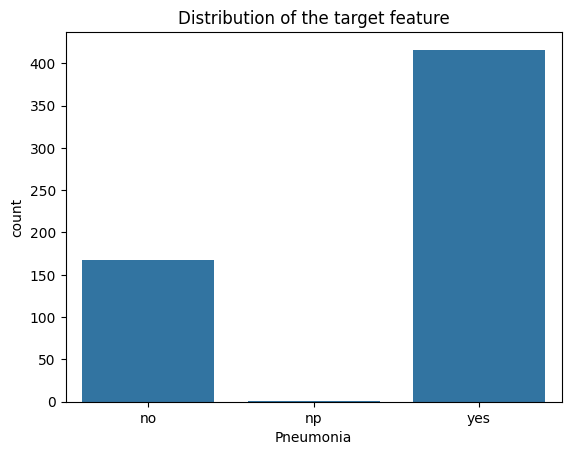

In [ ]:
# Check for missing values
observations.isnull().sum()
# Summary statistics
print(observations.describe())
# Visualise the distribution of the target feature
sns.countplot(x='Pneumonia', data=observations)
plt.title('Distribution of the target feature')
plt.show()

In [ ]:
#check for errors in data
print(observations['Pneumonia'].value_counts())
observations['Pneumonia'] = observations['Pneumonia'].replace('np', 'no')
print("")
print("Removal of np")
print("")
print(observations['Pneumonia'].value_counts())

Pneumonia
yes    416
no     167
np       1
Name: count, dtype: int64

Removal of np

Pneumonia
yes    416
no     168
Name: count, dtype: int64


There is an error in the data, as 'np' most likely was meant to be no. This will be handled by editing the error to become 'no'. You can also see from this graph that this dataset is  imbalanced. This could lead to biased and inaccurate results from the supervised learning model. In order to handle this, I need to make sure to use other measurements to see the success of each learning models in this report.

Exception ignored in: <function _xla_gc_callback at 0x7ff366e61c60>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


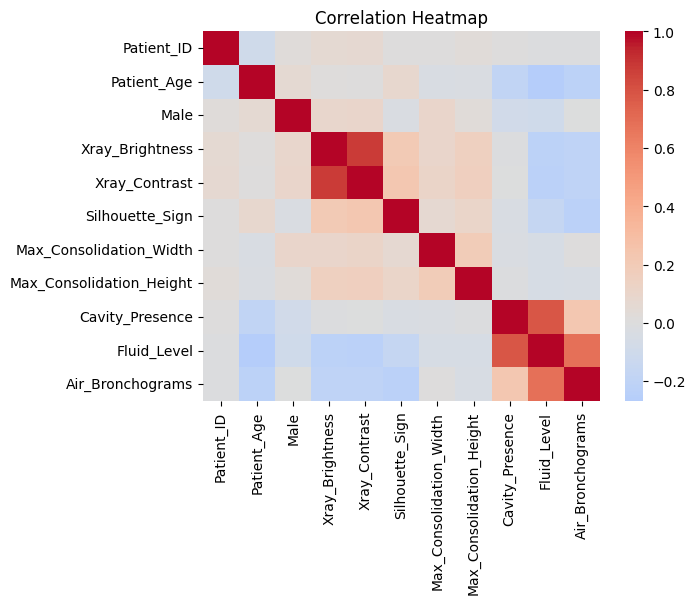

In [ ]:
observations_copy = pd.DataFrame(observations)
observations_copy = observations_copy.drop(columns='Pneumonia')
corr_matrix = observations_copy.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center = 0)
plt.title('Correlation Heatmap')
plt.show()

After looking at the corrolation graph, I took out any irrelevent data, as this would be noise for the model, making the prediciton less accurate. An example is the patient's ID, which has no correlation with the fact they have pneumonia.

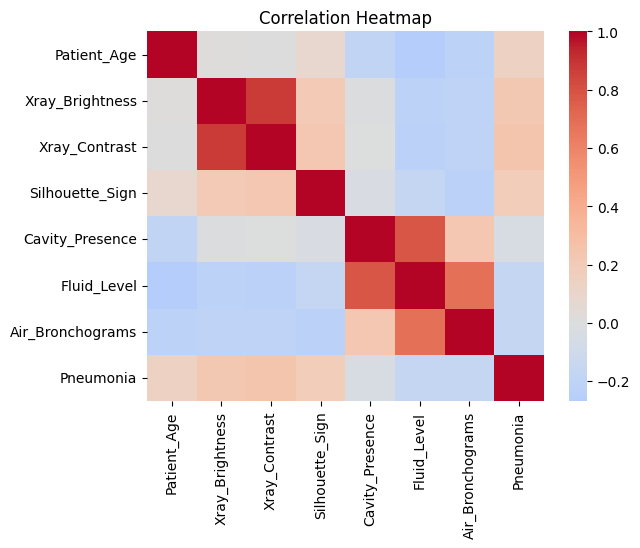

In [ ]:
#Dropping any irrelevent data
observations = observations.drop(columns='Patient_ID')
observations = observations.drop(columns='Max_Consolidation_Width')
observations = observations.drop(columns='Max_Consolidation_Height')
observations = observations.drop(columns='Male')

#observe the correlation now
observations_copy = pd.DataFrame(observations)
observations_copy['Pneumonia'] = observations_copy['Pneumonia'].map({'yes': 1, 'no': 0})
corr_matrix = observations_copy.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm',annot=False,center = 0)
plt.title('Correlation Heatmap')
plt.show()

After taking out the columns, you can see from the graph that there are stronger correlations now, which should make the model perform better.

Next, I need to remove any duplicate data or missing data as this result in biased results, increased computational costs and a fluctuated sample size. I then plot a box and whisker plot to look for any extreme outliers.

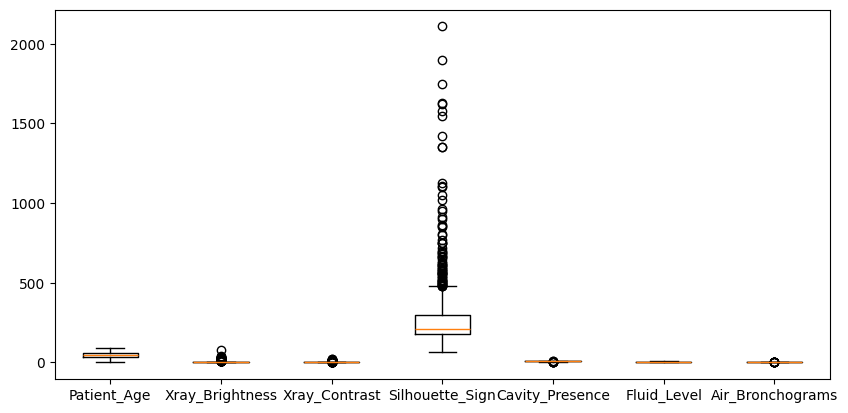

<class 'pandas.core.frame.DataFrame'>
Index: 570 entries, 0 to 583
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Patient_Age       570 non-null    int64  
 1   Xray_Brightness   570 non-null    float64
 2   Xray_Contrast     570 non-null    float64
 3   Silhouette_Sign   570 non-null    int64  
 4   Cavity_Presence   570 non-null    float64
 5   Fluid_Level       570 non-null    float64
 6   Air_Bronchograms  570 non-null    float64
 7   Pneumonia         570 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 40.1+ KB
None


In [ ]:
# Drop any duplicate rows
observations = observations.drop_duplicates()
observations = observations.dropna()

# Checking for any numerical errors in the data
examples = observations.drop(columns='Pneumonia')

# Set the figure size
plt.figure(figsize=(10, 4.8))

# Create the boxplot
plt.boxplot(examples)

# Add x-labels
plt.xticks(range(1, len(examples.columns) + 1), examples.columns)

# Show the plot
plt.show()

print(observations.info())

As you can see from the blox plot , Silhouette_Sign has the highest median and the largest range of values. If you look on the corrolation graph, you can also see that it has a strong positive correlation to identifying whether the patient has pneumonia. For this reason, I felt its best I keep the data to be analysed.

Now the data has been fully prapred and cleaned for the model. It is worth noting that in the process of building a model, every little detail can effect the accuracy of the model, including the quality of data, which is why its crutial that this step was thorough.

## Measurement of Success for this model

In [ ]:
def success_measure(pipeline, test_examples, test_labels):
  #make prediction
  label_pred = pipeline.predict(test_examples)
  # Generate the confusion matrix
  cm = confusion_matrix(test_labels, label_pred)
  print("Confusion Matrix:")
  print(cm)
  # Plotting the confusion matrix
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.title('Confusion Matrix')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()
  # calculate TPR and FPR
  TP = cm[1, 1]  # True Positives
  FN = cm[1, 0]  # False Negatives
  FP = cm[0, 1]  # False Positives
  TN = cm[0, 0]  # True Negatives
  TPR = TP / (TP + FN)
  FPR = FP / (FP + TN)
  print(f"True Positive Rate (TPR): {TPR:.3f}")
  print(f"False Positive Rate (FPR): {FPR:.3f}")

  # Calculate precision and recall, specifying the positive class (e.g., 'yes')
  precision = precision_score(test_labels, label_pred, pos_label=1)
  print(f"Precision: {precision:.3f}")
  recall1 = recall_score(test_labels, label_pred, pos_label=0)
  print(f"Recall Score: {recall1:.3f}")
  f1 = 2 * (precision * recall1) / (precision + recall1)
  print(f"F1 Score: {f1:.3f}")

  from sklearn.metrics import roc_curve, auc
  # Generate predicted probabilities for the positive class
  y_prob = pipeline.predict_proba(test_examples)[:, 1]
  #calculating mean squared error
  mse = mean_squared_error(test_labels, y_prob)
  print(f"Mean Squared Error: {mse:.3f}")
  # Calculate ROC curve
  fpr, tpr, thresholds = roc_curve(test_labels, y_prob)
  roc_auc = auc(fpr, tpr)
  print(f"ROC AUC: {roc_auc:.3f}")
  # Plot the ROC curve
  plt.figure()
  plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.3f})')
  plt.plot([0, 1], [0, 1], 'k--')
  # Dashed diagonal line
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc='lower right')
  plt.show()

I've created a reuseable function that will be used to measure the success of each model I test. This code provides a comprehensive evaluation of the model's performance on the test data using various metrics: confusion matrix, TPR/FPR, precision/recall/F1 score, ROC curve, and AUC. This information can help me understand how well the model is classifying the data and identify any potential areas for improvement.

## Model 1 evaluation : Decision Tree Classifier
The following code cell evaluates a Decision Tree model. To measure the success of the model, I'll be using K-Fold Cross Validation, as this is the golden standard approach to using validation data in a supervised learning recipe. This will be conducted using non test data, as I want to make sure no data leakage occurs during the tuning process of the model.

I use the AUC Metric as a base measurement for all models as it gives a good indication to the True Positives over the False Positives.Once I'm done using the hyperparameters, I will conduct a final accuracy testing using the success measurement function I've created with test data in the model. This will give a detailed breakdown of other metrics like precision, recall, ROC curves and F1 Score, so I get to analyse the model.


###Data Splitting

In [ ]:
def data_split(test_size):
  #Data Spliting
  #Set the name of the target feature
  target_feature = 'Pneumonia'
  # Ensure the 'diagnosis' column is treated as categorical
  observations[target_feature] = observations[target_feature].astype('category')
  # Replace categorical labels with numeric values before splitting
  observations[target_feature] = observations[target_feature].replace({'no': 0, 'yes': 1})
  # Separate features and target
  examples = observations.drop(target_feature, axis=1)
  # Features (drop the target)
  labels = observations[target_feature]  # Target as numeric (0 for No, 1 for Yes)

  non_test_examples, test_examples, non_test_labels, test_labels = train_test_split(
      examples,
      labels,
      test_size=test_size,
      random_state=99,
      shuffle=True,
      stratify=labels
  )
  return non_test_examples, test_examples, non_test_labels, test_labels

Due to the dataset imbalance, I need to use stratified sampling. This ensures that each class is represented proportionally in both the training and testing sets. It is crucial for building accurate and unbiased machine learning models. For each model, I'll be using a variety of different measurements to analyse the success rate of their performances.

In [ ]:
non_test_examples, test_examples, non_test_labels, test_labels = data_split(0.4)
# Set up a StratifiedKFold object ready to figure out the indices of the example/label pairs in 5 different folds, using stratified sampling
skf = StratifiedKFold(n_splits=5)

# Generate the indices for each fold, maintining the label ratios seen in non_test_labels
indices = list(skf.split(non_test_examples, non_test_labels))

# Create a pipeline combining our model with our preprocessing step
pipeline = Pipeline([('model', DecisionTreeClassifier())])

#train model using training data
pipeline.fit(non_test_examples, non_test_labels)

# calculate the area under curve scores for each of the 5 folds, using k-fold cross validation, and return them in an array
auc = cross_val_score(pipeline, non_test_examples, non_test_labels, cv=indices, scoring='roc_auc')

# Display all the accuracies,  one per fold
print(auc.round(3))
print("Average ROC Value:", round(np.mean(auc),3))

[0.714 0.598 0.679 0.645 0.608]
Average ROC Value: 0.649


Before cleaning data, I was getting an average ROC AUC of 0.59 which isn't the greatest results. Cleaning the data caused it to jump by 0.1, which is pretty impressive, but not accurate enough to diagnose patients.This is expected, as I have not yet used any of the hyperparameters.

###Hyperparameters
To get the best performance from the model, I must use the model's hyperparameters. Hyperparameter tuning is done to achieve the best and most stable solution, which is crutial when it comes to giving patients the right information. The first hyperparameter I wanted to test was the tree depth. As you'll see from the output, the best tree depth seems to be around 2, bumping the ROC AUC of the model to 72%, which is a 0.8% increase. However, I must be aware that trying to perfect this model might cause overfitting, which is not ideal as I want the model to be able to accurately diagnose patients as having the disease or not.

In [ ]:
# Define the range of hyperparameter values we're interested in
tree_depths = list(range(1, 50, 1)) # using a range to find the optimum holdout
# And a list to hold the resulting auc average
auc_average = []
#store the best auc score and hyperparameter value
best_score = 0
best_params = 0
for tree_depth in tree_depths:

  # Generate the indices for each fold, maintining the label ratios seen in non_test_labels
  indices = list(skf.split(non_test_examples, non_test_labels))
  pipeline = Pipeline([('model', DecisionTreeClassifier(max_depth=tree_depth))])

  # calculate the area under curve scores for each of the 5 folds, using k-fold cross validation, and return them in an array
  auc = cross_val_score(pipeline, non_test_examples, non_test_labels, cv=indices, scoring='roc_auc')
  # Display the average area under curve score
  auc_average.append(np.mean(auc))
  if np.mean(auc) > best_score:
    best_score = np.mean(auc)
    best_params = tree_depth
  #counter += 1
print("Best Area Under Curve:", round(best_score,3), "with", best_params, "depth")

Best Area Under Curve: 0.718 with 2 depth


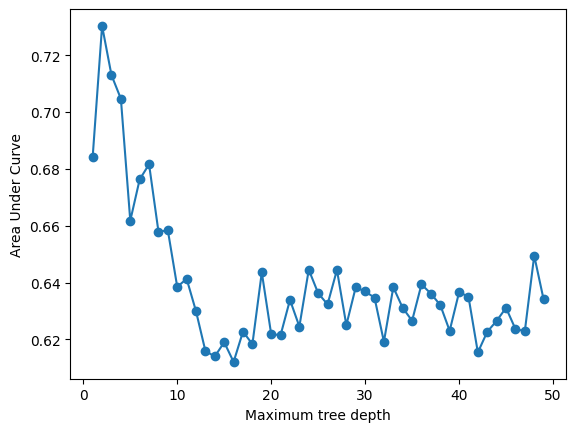

In [ ]:
plt.figure()
plt.plot(tree_depths, auc_average, marker='o', linestyle='-')
plt.xlabel('Maximum tree depth')
plt.ylabel('Area Under Curve')
plt.show()

Another hyperparameter I investigated was the minimum parent node size. This value specifies the number of labels that a node in the tree must have before it considers splitting.

The results from this showed a better performance of 0.731, which is a slight improvement before, but ever percentage matters.

Best Area Under Curve: 0.731 with 130 min parent size


Text(0, 0.5, 'Area Under Curve (AUC)')

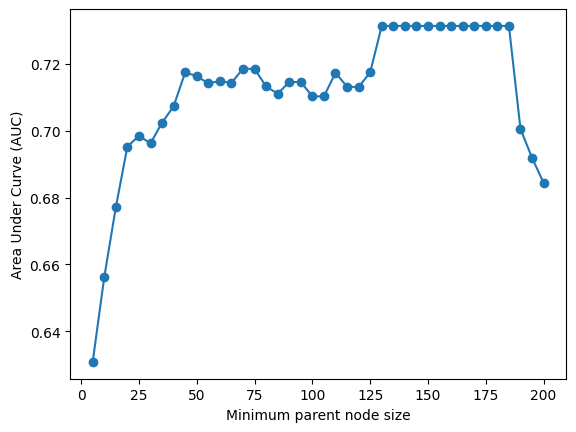

In [ ]:
auc_average = []
#store the best auc and hyperparameter value
best_score = 0
best_params = 0
#range for the hyperparameter
min_parent_sizes = list(range(5, 201, 5))
#Create a decision tree classifier model object

for min_parent_size in min_parent_sizes:
  pipeline = Pipeline([('model', DecisionTreeClassifier(min_samples_split=min_parent_size))])
  # calculate the auc scores for each of the 5 folds, using k-fold cross validation, and return them in an array
  auc = cross_val_score(pipeline, non_test_examples, non_test_labels, cv=indices,  scoring='roc_auc')
  # Display the average auc
  auc_average.append(np.mean(auc))
  if np.mean(auc) > best_score:
    best_score = np.mean(auc)
    best_params = min_parent_size
print("Best Area Under Curve:", round(best_score,3), "with", best_params, "min parent size")


# Show evaluation results graphically
plt.figure()
plt.plot(min_parent_sizes, auc_average, marker='o', linestyle='-')
plt.xlabel('Minimum parent node size')
plt.ylabel('Area Under Curve (AUC)')

Another hyperparameter adjustment I used was the minimum samples leaf. This controls the minimum number of samples required to be at a leaf node. As you can see, it performed signicantly higher than the other two, scoring a 0.75

Best Area Under Curve: 0.75 with 50 min sample leaf


Text(0, 0.5, 'Area Under Curve')

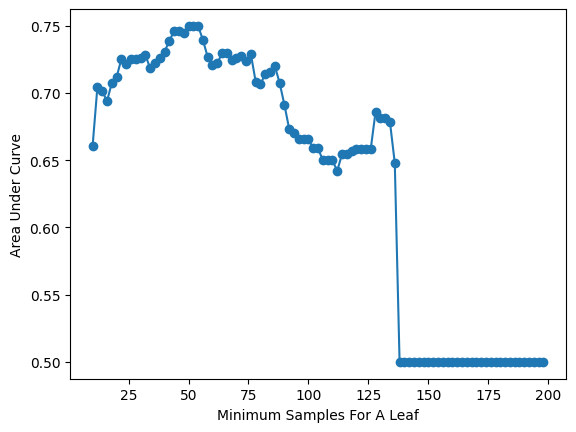

In [ ]:
auc_average = []
#store the best auc and hyperparameter value
best_score = 0
best_params = 0
#range for the hyperparameter
min_samples_leaf = list(np.arange(10, 200, 2))
#Create a decision tree classifier model object
for min_sample_leaf in min_samples_leaf:
  pipeline = Pipeline([('model', DecisionTreeClassifier(min_samples_leaf=min_sample_leaf))])
  # calculate the auc scores for each of the 5 folds, using k-fold cross validation, and return them in an array
  auc = cross_val_score(pipeline, non_test_examples, non_test_labels, cv=indices, scoring='roc_auc')
  # adds auc to the list
  auc_average.append(np.mean(auc))
  if np.mean(auc) > best_score:
    best_score = np.mean(auc)
    best_params = min_sample_leaf
  #counter += 1
print("Best Area Under Curve:", round(best_score,3), "with", best_params, "min sample leaf")

# Show evaluation results graphically
plt.figure()
plt.plot(min_samples_leaf, auc_average, marker='o', linestyle='-')
plt.xlabel('Minimum Samples For A Leaf')
plt.ylabel('Area Under Curve')

The hyperparameter graphs clearly highlighted a case of overfitting, as you can see drastic spikes of good accuracies, followed by a sharp decline. After conducting testing three hyperparameter, it was a clear winner, so I shall move onto the measurement of success.

### Conclusion


The code below will be utilising the success_measure function to fully show how the model performs.

Confusion Matrix:
[[ 23  43]
 [ 25 137]]


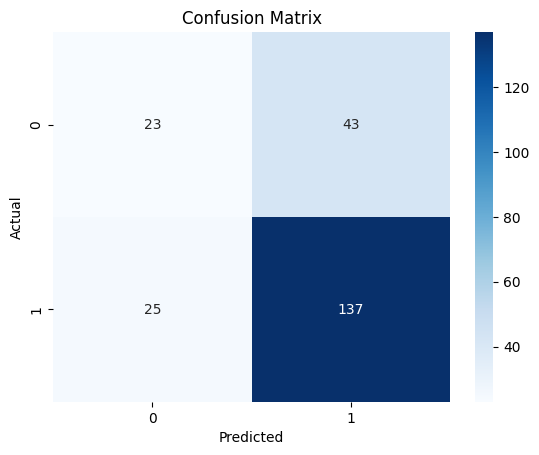

True Positive Rate (TPR): 0.846
False Positive Rate (FPR): 0.652
Precision: 0.761
Recall Score: 0.348
F1 Score: 0.478
Mean Squared Error: 0.187
ROC AUC: 0.700


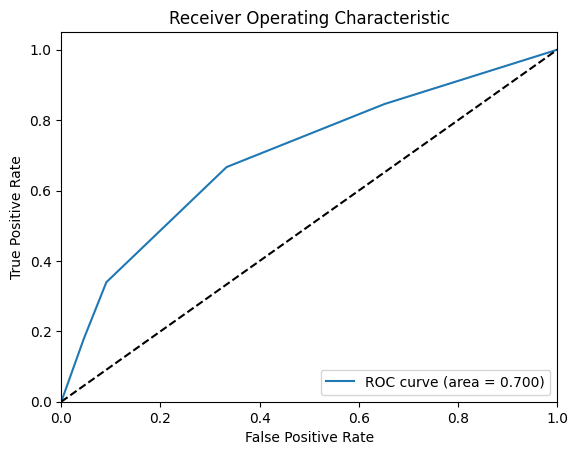

In [ ]:
# Create a pipeline combining our model with our preprocessing step
pipeline1 = Pipeline([('model', DecisionTreeClassifier(min_samples_leaf=50))])

#train model using training data
pipeline1.fit(non_test_examples, non_test_labels)

success_measure(pipeline1, test_examples, test_labels)

Overall, the decision tree classifier shows a trade-off between recall and precision based on these measures. Although it frequently misclassifies negative cases as positive (high FPR), it is comparatively good at recognising positive cases (high TPR). The poor recall score indicates that a sizable percentage of the positive cases are missed by the model.Consequently, we can assume that the dataset needs a model that can better handle inbalanced data.

## Model 2 evaluation: Random Forest Classifer
The following code cell evaluates a Random Forest Classifer model. I got an average cross validation AUC score of 0.714, which is already outperforming the decision tree classifer.I also implement the Standard Scaler into this model,to see the effect on the performance of the model. This means it transforms the data so that it has a mean of 0 and a standard deviation of 1.This helps the model as it ensures that features with different scales contribute equally to the model's learning process.

###Data Splitting

In [ ]:
param = list(np.arange(0.20,0.40,0.01))
#list of holdout values between 0.4 to 0.2
best_score = 0
best_params = 0
auc_average = []

for i in param:
  non_test_examples, test_examples, non_test_labels, test_labels = data_split(i)
  # Create a pipeline combining our model with our preprocessing step
  pipeline = Pipeline([('model',RandomForestClassifier())])
  #train model using training data
  pipeline.fit(non_test_examples, non_test_labels)
  # calculate the auc scores for each of the 5 folds, using k-fold cross validation, and return them in an array
  auc = cross_val_score(pipeline, non_test_examples, non_test_labels, scoring='roc_auc')
  auc_average.append(np.mean(auc))
  if np.mean(auc) > best_score:
    best_score = np.mean(auc)
    best_params = i

print("Best Area Under Curve:", round(best_score,3),", with", best_params, "test size")
print(auc_average)

Best Area Under Curve: 0.712 , with 0.24000000000000005 test size
[0.692436993206224, 0.6751711538461539, 0.6848980463980463, 0.7080347788412304, 0.7117863564251719, 0.7112568306010929, 0.6875555555555557, 0.6933003766478343, 0.6902538667107124, 0.6948938907739113, 0.6702176637245287, 0.6824004799548277, 0.6716101586160874, 0.6668794000612183, 0.6833376441867008, 0.6823880521993729, 0.6811552826258709, 0.7019877181641888, 0.7051056022408964, 0.6982428571428572]


In [ ]:
non_test_examples,test_examples, non_test_labels, test_labels = data_split(0.24)

In [ ]:

# Set up a StratifiedKFold object ready to figure out the indices of the example/label pairs in 5 different folds, using stratified sampling
skf = StratifiedKFold(n_splits=5)

# Generate the indices for each fold, maintining the label ratios seen in non_test_labels
indices = list(skf.split(non_test_examples, non_test_labels))

# Create a pipeline combining our model with our preprocessing step
pipeline = Pipeline([('scaler', StandardScaler()),('model', RandomForestClassifier())])

#train model using training data
pipeline.fit(non_test_examples, non_test_labels)

 # calculate the area under curve scores for each of the 5 folds, using k-fold cross validation, then gets the mean value
auc = cross_val_score(pipeline, non_test_examples, non_test_labels, cv=indices, scoring='roc_auc')

# Display all the auc's,  one per fold
print(auc.round(3))

# Display the average area under curve score
print(f"Average Area under Curve: {np.mean(auc):.3f}")

[0.607 0.749 0.715 0.765 0.76 ]
Average Area under Curve: 0.719


It is evident that the Standard Scaler enhances the model.Now I will change the n_splits and see which one is most efficient for this model, without overfitting the model.

In [ ]:
#range for the k value
next_range = list(range(2, 10, 1))
#store the area under curve value
auc_average = []
#store the best values
best_score = 0
best_params = 0
for n in next_range:
  # Set up a StratifiedKFold object ready to figure out the indices of the example/label pairs in different folds, using stratified sampling
  skf = StratifiedKFold(n_splits= n)
  # Generate the indices for each fold, maintining the label ratios seen in non_test_labels
  indices = list(skf.split(non_test_examples, non_test_labels))

  # Create a pipeline combining our model with our preprocessing step
  pipeline = Pipeline([('scaler', StandardScaler()),('model', RandomForestClassifier())])

  #train model using training data
  pipeline.fit(non_test_examples, non_test_labels)

   # calculate the area under curve scores for each of the 5 folds, using k-fold cross validation, then gets the mean value
  auc = cross_val_score(pipeline, non_test_examples, non_test_labels, cv=indices, scoring='roc_auc')
  auc_average.append(np.mean(auc))
  if np.mean(auc) > best_score:
    best_score = np.mean(auc)
    best_params = n

print("Best Area Under Curve:", round(best_score,3), "with", best_params, "k folds")

Best Area Under Curve: 0.727 with 4 k folds


After rerunning the code multiple times, the output states that 4 K folds is the optimum value for this model.

###Hyperparameters


One of the most impactful hyperparameter is the Number of Trees, as it determines the overall complexity and accuracy of the model. More trees generally improve the accuracy, but also increase computational time.

Best Area Under Curve: 0.742 with 44 Num of trees


Text(0, 0.5, 'ROC Area Under Curve ')

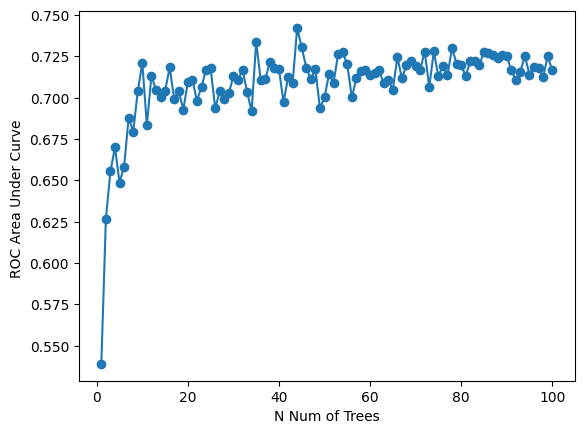

In [ ]:
#range for the amount of trees
trees = list(range(1, 101, 1))
#store the area under curve scores
auc_average = []
#store the best values
best_score = 0
best_params = 0

for t in trees:

  # Set up a StratifiedKFold object ready to figure out the indices of the example/label pairs in 4 different folds, using stratified sampling
  skf = StratifiedKFold(n_splits=4)

  # Generate the indices for each fold, maintining the label ratios seen in non_test_labels
  indices = list(skf.split(non_test_examples, non_test_labels))
  pipeline = Pipeline([('scaler', StandardScaler()), ('model', RandomForestClassifier(n_estimators=t))])

   # calculate the area under curve scores for each of the 4 folds, using k-fold cross validation, then gets the mean value
  auc = cross_val_score(pipeline, non_test_examples, non_test_labels, cv=indices, scoring='roc_auc')
  auc_average.append(np.mean(auc))
  #if the best score is beaten, it will be stored
  if np.mean(auc) > best_score:
    best_score = np.mean(auc)
    best_params = t
# Show evaluation results graphically
print("Best Area Under Curve:", round(best_score,3), "with", best_params, "Num of trees")

plt.figure()
plt.plot(trees, auc_average, marker='o', linestyle='-')
plt.xlabel('N Num of Trees')
plt.ylabel('ROC Area Under Curve ')

My results show that roughly 44 number of trees used in the hyperparameter would boosted the average AUC score of 0.74, which again has increased from our previous run. Lets have a look at other hyperparameters, Max Depth. This determines the max depths for each tree that is used in the random forest classifier.

Best Area Under Curve: 0.732 with 4 depth


Text(0, 0.5, 'Area Under Curve')

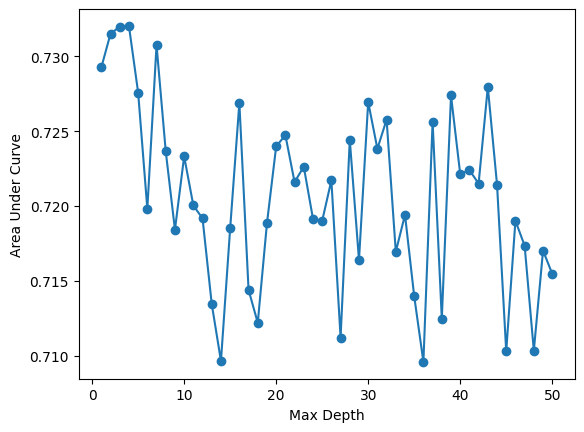

In [ ]:
#range for the max depth
depth = list(range(1, 51, 1))
#store the area under curve score
auc_average = []
#store the best values
best_score = 0
best_params = 0
for d in depth:
  # Set up a StratifiedKFold object ready to figure out the indices of the example/label pairs in 4 different folds, using stratified sampling
  skf = StratifiedKFold(n_splits=4)
  # Generate the indices for each fold, maintining the label ratios seen in non_test_labels
  indices = list(skf.split(non_test_examples, non_test_labels))
  #I want to see if the hyperparameter outperforms by itself, then I will add the previous hyperparameters
  pipeline = Pipeline([('scaler', StandardScaler()),('model', RandomForestClassifier(max_depth=d))])
  # calculate the area under curve scores for each of the 5 folds, using k-fold cross validation, then gets the mean value
  auc = cross_val_score(pipeline, non_test_examples, non_test_labels, cv=indices, scoring='roc_auc')
  auc_average.append(np.mean(auc))
  if np.mean(auc) > best_score:
    best_score = np.mean(auc)
    best_params = d
# Show evaluation results graphically
print("Best Area Under Curve:", round(best_score,3), "with", best_params, "depth")
plt.figure()
plt.plot(depth, auc_average, marker='o', linestyle='-')
plt.xlabel('Max Depth')
plt.ylabel('Area Under Curve')

The max depth performed best at 4 depth, with a AUC score of 0.73. This slightly underperforms the previous hyper parameter. Now lets test the minimum samples leaf hyperparameter



Best Area under Curve: 0.74 with 0.2 min samples leaf


Text(0, 0.5, 'Accuracy')

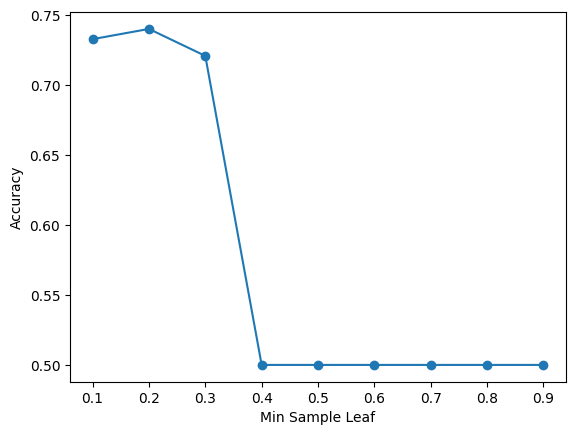

In [ ]:
#range for the amount of min sample leaf size
sample = list(np.arange(0.1,1.0,0.1))
#store the area under curve score
auc_average = []
#store the best values
best_score = 0
best_params = 0

for s in sample:

  # Set up a StratifiedKFold object ready to figure out the indices of the example/label pairs in 4 different folds, using stratified sampling
  skf = StratifiedKFold(n_splits=4)

  # Generate the indices for each fold, maintining the label ratios seen in non_test_labels
  indices = list(skf.split(non_test_examples, non_test_labels))
  #I want to see if the hyperparameter outperforms by itself, then I will add the previous hyperparameters
  pipeline = Pipeline([('scaler', StandardScaler()),('model', RandomForestClassifier(min_samples_leaf=s))])

  # calculate the area under curve scores for each of the 5 folds, using k-fold cross validation, then gets the mean value
  auc = cross_val_score(pipeline, non_test_examples, non_test_labels, cv=indices, scoring='roc_auc')
  auc_average.append(np.mean(auc))
  if np.mean(auc) > best_score:
    best_score = np.mean(auc)
    best_params = s
# Show evaluation results graphically
print("Best Area under Curve:", round(best_score,3), "with", best_params, "min samples leaf")

plt.figure()
plt.plot(sample, auc_average, marker='o', linestyle='-')
plt.xlabel('Min Sample Leaf')
plt.ylabel('Accuracy')

### Conclusion

Confusion Matrix:
[[13 26]
 [12 86]]


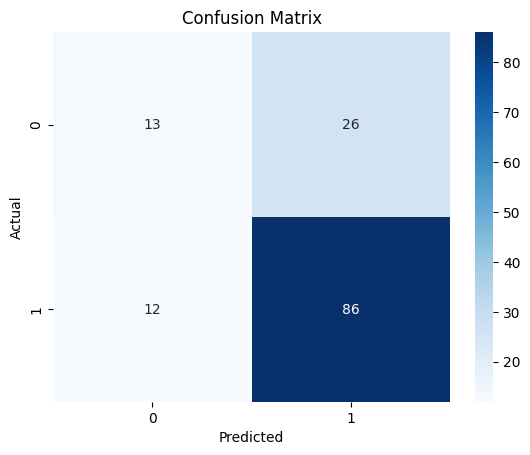

True Positive Rate (TPR): 0.878
False Positive Rate (FPR): 0.667
Precision: 0.768
Recall Score: 0.333
F1 Score: 0.465
Mean Squared Error: 0.176
ROC AUC: 0.733


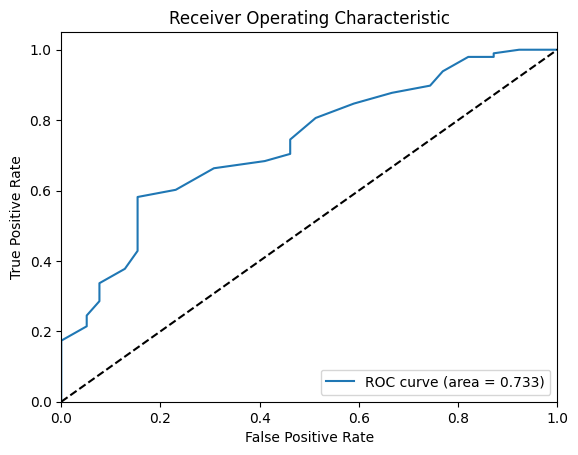

In [ ]:
# Create a pipeline combining our model with our preprocessing step
pipeline2 = Pipeline([('scaler', StandardScaler()),('model', RandomForestClassifier(n_estimators=44))])

#train model using training data
pipeline2.fit(non_test_examples, non_test_labels)

#Run success function
success_measure(pipeline2, test_examples, test_labels)

Overall, while the model shows promise in identifying true positive cases, its high false positive rate and low precision and recall limit its overall effectiveness. Although the ROC AUC score is at a decent standard, the F1 score indicates a poor balance between precision and recall. A significant portion of the positive predictions made by the model are incorrect, whilst the model fails to identify a large proportion of actual positive cases. In cases like pnuemonia, these results are not ideal.

## Model 3 evaluation: K-Nearest Neighbours (k-NN) Classifier

For this model, I am following the same methodology as the random forest classifier. Firstly, I want to test the best number of splits for the stratified sampling.

###Data Splitting

First, I need to test out the best number of splits and the holdout value for this model.

In [ ]:
param = list(np.arange(0.20,0.40,0.01))
best_score = 0
best_params = 0
auc_average = []

for i in param:
  non_test_examples, test_examples, non_test_labels, test_labels = data_split(i)
  # Create a pipeline combining our model with our preprocessing step
  pipeline = Pipeline([('scaler', StandardScaler()),('model',  KNeighborsClassifier())])
  #train model using training data
  pipeline.fit(non_test_examples, non_test_labels)
  # calculate the auc scores for each of the 5 folds, using k-fold cross validation, and return them in an array
  auc = cross_val_score(pipeline, non_test_examples, non_test_labels, scoring='roc_auc')
  auc_average.append(np.mean(auc))
  if np.mean(auc) > best_score:
    best_score = np.mean(auc)
    best_params = i

print("Best Area Under Curve:", round(best_score,3),", with", best_params, "test size")
print(auc_average)

Best Area Under Curve: 0.68 , with 0.2 test size
[0.6801183431952663, 0.649220673076923, 0.6461674297924298, 0.6770503761471505, 0.6693717609730301, 0.6780278688524591, 0.6561166666666667, 0.6634039548022599, 0.6590793056861399, 0.6311300490105823, 0.6470129127165741, 0.6600190570299267, 0.6424836379035984, 0.6474533210896848, 0.6400781550152621, 0.6122268454815625, 0.6384274222509516, 0.6703149464914171, 0.6654644257703082, 0.6664142857142857]


In [ ]:
non_test_examples, test_examples, non_test_labels, test_labels = data_split(0.2)
#range for the k value
next_range = list(range(2, 15, 1))
#store the area under curve value
auc_average = []
#store the best values
best_score = 0
best_params = 0
for n in next_range:
  # Set up a StratifiedKFold object ready to figure out the indices of the example/label pairs in 4 different folds, using stratified sampling
  skf = StratifiedKFold(n_splits= n)
  # Generate the indices for each fold, maintining the label ratios seen in non_test_labels
  indices = list(skf.split(non_test_examples, non_test_labels))

  # Create a pipeline combining our model with our preprocessing step
  pipeline = Pipeline([('scaler', StandardScaler()),('model',  KNeighborsClassifier())])

  #train model using training data
  pipeline.fit(non_test_examples, non_test_labels)

   # calculate the area under curve scores for each of the 5 folds, using k-fold cross validation, then gets the mean value
  auc = cross_val_score(pipeline, non_test_examples, non_test_labels, cv=indices, scoring='roc_auc')
  auc_average.append(np.mean(auc))
  if np.mean(auc) > best_score:
    best_score = np.mean(auc)
    best_params = n

print("Best Area Under Curve:", round(best_score,3), "with", best_params, "k folds")
print(auc_average)

Best Area Under Curve: 0.695 with 6 k folds
[0.63234443167981, 0.6513318771959694, 0.6702149872140557, 0.6801183431952663, 0.6954725829725831, 0.6701619528315083, 0.6849511298421807, 0.678923169200947, 0.6743431048118549, 0.6880169247332256, 0.6846991742825076, 0.6726293706293707, 0.6691985852311939]


Here you can see that we got the values of 0.2 for the holdout and 6k folds.

### Hyperparameters

As with every model, I need to apply some hyperparameters in order to get the best out of them.For this model, I have decided to change the number of nearest neighbours. The AUC score was 0.714 with 44 number of neighbours, which has improved the model's performance.

In [ ]:
#Creating variables to store the best score, and its parameter
best_score = 0
best_params = 0
auc_average = []
n_neighbours = list(range(1, 201, 1))
skf = StratifiedKFold(n_splits=6)
#range for the k value
next_range = list(range(2, 15, 1))
for n in n_neighbours:
  # Generate the indices for each fold, maintining the label ratios seen in non_test_labels
  indices = list(skf.split(non_test_examples, non_test_labels))
  pipeline = Pipeline([('scaler', StandardScaler()), ('model', KNeighborsClassifier(n_neighbors=n))])
  # calculate the accuracy scores for each of the 5 folds, using k-fold cross validation, and return them in an array
  auc = cross_val_score(pipeline, non_test_examples, non_test_labels, cv=indices, scoring='roc_auc')
  auc_average.append(np.mean(auc))
  if np.mean(auc) > best_score:
    best_score = np.mean(auc)
    best_params = n
# Show evaluation results graphically
print("Best Area Under Curve:", round(best_score,3),", with", best_params,"num of neighbours")

Best Area Under Curve: 0.714 , with 44 num of neighbours


Another hyperparameter you can alter is the algorithm used by the model to compute the nearest neighbors. These are the following algorithms: 'auto', 'ball_tree', 'kd_tree', 'brute'. The graph shows that all perform the same, which means the default value, auto, is the best hyperparameter

Best Area Under Curve: 0.695 , with auto algorithm


Text(0, 0.5, 'Area Under Curve')

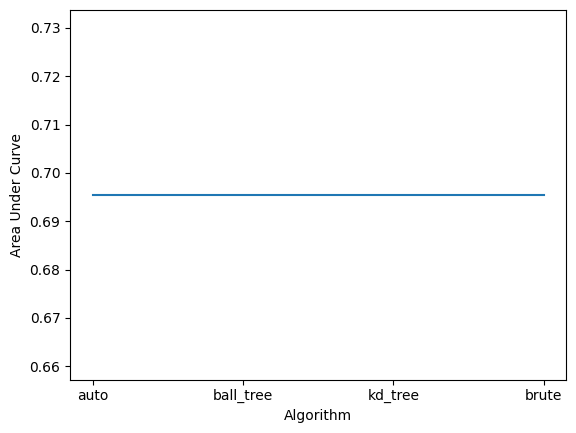

In [ ]:
algo = ['auto', 'ball_tree', 'kd_tree', 'brute']
#Creating variables to store the best score, and its parameter
best_score = 0
best_params = ""
auc_average = []
for a in algo:
  skf = StratifiedKFold(n_splits=6)
  # Generate the indices for each fold, maintining the label ratios seen in non_test_labels
  indices = list(skf.split(non_test_examples, non_test_labels))
  pipeline = Pipeline([('scaler', StandardScaler()), ('model', KNeighborsClassifier(algorithm=a))])
  # calculate the accuracy scores for each of the 2 folds, using k-fold cross validation, and return them in an array
  auc = cross_val_score(pipeline, non_test_examples, non_test_labels, cv=indices, scoring='roc_auc')
  auc_average.append(np.mean(auc))
  if np.mean(auc) > best_score:
    best_score = np.mean(auc)
    best_params = a
# Show evaluation results graphically
print("Best Area Under Curve:", round(best_score,3),", with", best_params, "algorithm")
plt.figure()
plt.plot(algo, auc_average, linestyle='-')
plt.xlabel('Algorithm')
plt.ylabel('Area Under Curve')

The final hyperparameter I wanted to test was the weights.This parameter determines how the votes of the neighbors are weighted.

In [ ]:
weight = ['uniform', 'distance']
for w in weight:
  skf = StratifiedKFold(n_splits=6)
  # Generate the indices for each fold, maintining the label ratios seen in non_test_labels
  indices = list(skf.split(non_test_examples, non_test_labels))
  pipeline = Pipeline([('scaler', StandardScaler()), ('model', KNeighborsClassifier(weights=w))])
  # calculate the accuracy scores for each of the 2 folds, using k-fold cross validation, and return them in an array
  auc = cross_val_score(pipeline, non_test_examples, non_test_labels, cv=indices, scoring='roc_auc')
  print("This is ", w ,"'s AUC Score: ", np.mean(auc), ".")


This is  uniform 's AUC Score:  0.6954725829725831 .
This is  distance 's AUC Score:  0.6911736411736412 .


I will now be altering the leaf size, using these hyperparameters, as they seem to be performing well together.

Best Area Under Curve: 0.632 , with 1 leaf size


Text(0, 0.5, 'Area Under Curve')

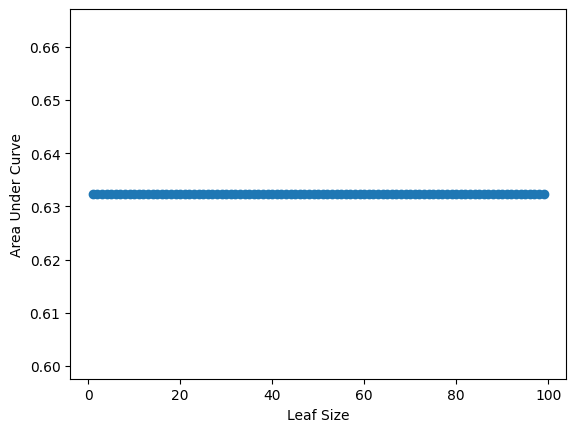

In [ ]:
leaf_size = list(range(1, 100, 1))
#Creating variables to store the best score, and its parameter
best_score = 0
best_params = 0
auc_average = []
for l in leaf_size:
  skf = StratifiedKFold(n_splits=2)
  # Generate the indices for each fold, maintining the label ratios seen in non_test_labels
  indices = list(skf.split(non_test_examples, non_test_labels))
  pipeline = Pipeline([('scaler', StandardScaler()), ('model', KNeighborsClassifier(leaf_size=l))])
  # calculate the accuracy scores for each of the 2 folds, using k-fold cross validation, and return them in an array
  auc = cross_val_score(pipeline, non_test_examples, non_test_labels, cv=indices, scoring='roc_auc')
  auc_average.append(np.mean(auc))
  if np.mean(auc) > best_score:
    best_score = np.mean(auc)
    best_params = l
# Show evaluation results graphically
print("Best Area Under Curve:", round(best_score,3),", with", best_params, "leaf size")
plt.figure()
plt.plot(leaf_size, auc_average, marker='o', linestyle='-')
plt.xlabel('Leaf Size')
plt.ylabel('Area Under Curve')

###Conclusion

After exhausting all possible hyperparameters, n_neighbour hyperparameter has the most impact. I will now run the success_measure function on the model and will see how it performs with test data

Confusion Matrix:
[[ 7 26]
 [ 6 75]]


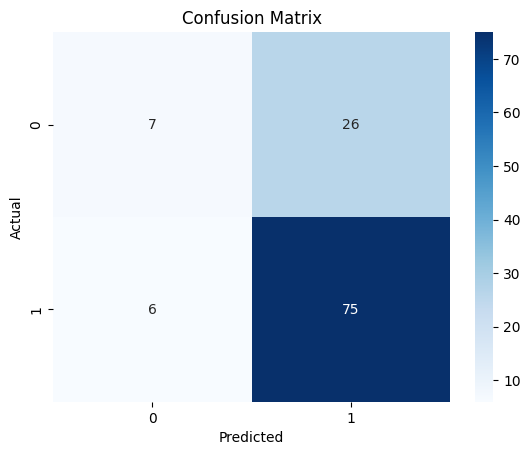

True Positive Rate (TPR): 0.926
False Positive Rate (FPR): 0.788
Precision: 0.743
Recall Score: 0.212
F1 Score: 0.330
Mean Squared Error: 0.184
ROC AUC: 0.704


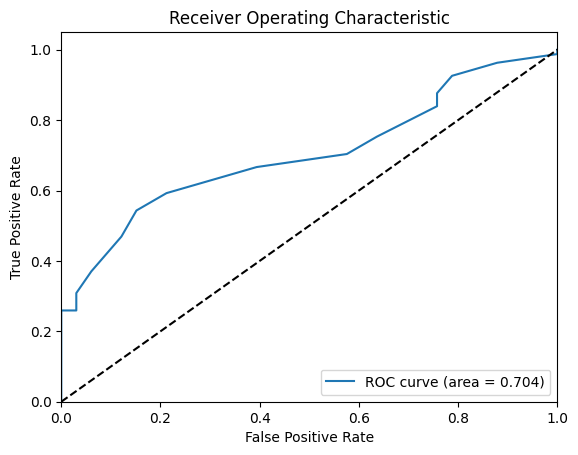

In [ ]:
# Create a pipeline combining our model with our preprocessing step
pipeline3 = Pipeline([('scaler', StandardScaler()),('model',KNeighborsClassifier(n_neighbors=44))])

#train model using training data
pipeline3.fit(non_test_examples, non_test_labels)


success_measure(pipeline3, test_examples, test_labels)

 Overall, while the model shows promise in identifying true positive cases, its high false positive rate and low recall limit its overall effectiveness. We can see that the model had a good balance between precision and recall, however it was underperforming compared to the random forest classifier when it came to the ROC Area under curve.

## Model 4 evaluation:Support Vector Machine (SVM)
For this model, I am following the same methodology as the random forest classifier. Firstly, I want to test the best number of splits for the stratified sampling, as well as the holdout for the dataset.

###Data Splitting

In [ ]:
param = list(np.arange(0.20,0.40,0.01))
best_score = 0
best_params = 0
auc_average = []

for i in param:
  non_test_examples, test_examples, non_test_labels, test_labels = data_split(i)
  # Create a pipeline combining our model with our preprocessing step
  pipeline = Pipeline([('scaler', StandardScaler()),('model',  SVC())])
  #train model using training data
  pipeline.fit(non_test_examples, non_test_labels)
  # calculate the auc scores for each of the 5 folds, using k-fold cross validation, and return them in an array
  auc = cross_val_score(pipeline, non_test_examples, non_test_labels, scoring='roc_auc')
  auc_average.append(np.mean(auc))
  if np.mean(auc) > best_score:
    best_score = np.mean(auc)
    best_params = i

print("Best Area Under Curve:", round(best_score,3),", with", best_params, "test size")
print(auc_average)

Best Area Under Curve: 0.664 , with 0.25000000000000006 test size
[0.654126671049748, 0.6284865384615383, 0.6209159035409035, 0.6571868131868132, 0.6497303014278161, 0.6638131147540983, 0.6198666666666667, 0.6233003766478343, 0.6585473153253881, 0.6333311414468206, 0.6218807889288438, 0.6318181818181818, 0.6373132796057697, 0.6211968166513621, 0.6238526323431984, 0.6033769689430067, 0.6410723263664442, 0.6316372189901601, 0.6310173669467787, 0.6157510204081632]


In [ ]:
non_test_examples, test_examples, non_test_labels, test_labels = data_split(0.25)
#range for the k value
next_range = list(range(2, 15, 1))
#store the area under curve value
auc_average = []
#store the best values
best_score = 0
best_params = 0
for n in next_range:
  # Set up a StratifiedKFold object ready to figure out the indices of the example/label pairs
  skf = StratifiedKFold(n_splits= n)
  # Generate the indices for each fold, maintining the label ratios seen in non_test_labels
  indices = list(skf.split(non_test_examples, non_test_labels))

  # Create a pipeline combining our model with our preprocessing step
  pipeline = Pipeline([('scaler', StandardScaler()),('model', SVC())])

  #train model using training data
  pipeline.fit(non_test_examples, non_test_labels)

   # calculate the area under curve scores for each of the 5 folds, using k-fold cross validation, then gets the mean value
  auc = cross_val_score(pipeline, non_test_examples, non_test_labels, cv=indices, scoring='roc_auc')
  auc_average.append(np.mean(auc))
  if np.mean(auc) > best_score:
    best_score = np.mean(auc)
    best_params = n

print("Best Area Under Curve:", round(best_score,3), "with", best_params, "k folds")
print(auc_average)

<ipython-input-13-3be3f4e64131>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  observations[target_feature] = observations[target_feature].replace({'no': 0, 'yes': 1})
<ipython-input-13-3be3f4e64131>:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  observations[target_feature] = observations[target_feature].replace({'no': 0, 'yes': 1})


Best Area Under Curve: 0.664 with 5 k folds
[0.6611989966322469, 0.5999427058918231, 0.6525891341256367, 0.6638131147540983, 0.6492577030812324, 0.6508114168852882, 0.6499451754385965, 0.6414429796782737, 0.6460304659498208, 0.6505276429518854, 0.6465559440559441, 0.6490493001362568, 0.6597544320758607]


So as you can see from the code cells above, we have got that 5 folds will be optimum for this model. The AUC isn't outperforming previous models, with an AUC score of 0.66, but this can always be improved using hyperparameters.

###Hyperparameters

Best Area Under Curve: 0.7 , with poly algorithm


Text(0, 0.5, 'Area Under Curve')

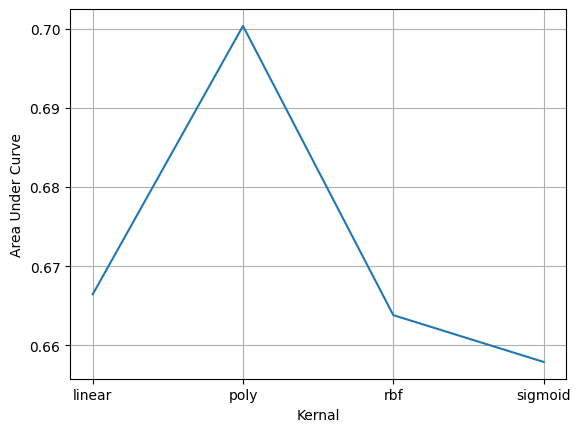

In [ ]:
k_values = [ 'linear', 'poly', 'rbf', 'sigmoid']
#Creating variables to store the best score, and its parameter
best_score = 0
best_params = ""
auc_average = []
for k in k_values:
  skf = StratifiedKFold(n_splits=5)
  # Generate the indices for each fold, maintining the label ratios seen in non_test_labels
  indices = list(skf.split(non_test_examples, non_test_labels))
  pipeline = Pipeline([('scaler', StandardScaler()), ('model', SVC(kernel=k))])
  # calculate the accuracy scores for each of the 2 folds, using k-fold cross validation, and return them in an array
  auc = cross_val_score(pipeline, non_test_examples, non_test_labels, cv=indices, scoring='roc_auc')
  auc_average.append(np.mean(auc))
  if np.mean(auc) > best_score:
    best_score = np.mean(auc)
    best_params = k
# Show evaluation results graphically
print("Best Area Under Curve:", round(best_score,3),", with", best_params, "algorithm")
plt.figure()
plt.grid(True)
plt.plot(k_values, auc_average, linestyle='-')
plt.xlabel('Kernal')
plt.ylabel('Area Under Curve')

As you can see, we have got an AUC score of 0.7 from the poly kernal.The "poly" kernel in the context of Support Vector Machines (SVMs) corresponds to the polynomial kernel.The kernal can aid in the identification of non-linear decision boundaries that better distinguish the classes.

In [ ]:
#Creating variables to store the best score, and its parameter
best_score = 0
best_params = 0
auc_average = []
# creates an array of 13 numbers logarithmically spaced between 10^-2 and 10^10.
C_range = np.logspace(-2, 10, 13)
for c in C_range:
  skf = StratifiedKFold(n_splits= 5)
  # Generate the indices for each fold, maintining the label ratios seen in non_test_labels
  indices = list(skf.split(non_test_examples, non_test_labels))
  pipeline = Pipeline([('scaler', StandardScaler()), ('model', SVC(C=c))])
  # calculate the accuracy scores for each of the 5 folds, using k-fold cross validation, and return them in an array
  auc = cross_val_score(pipeline, non_test_examples, non_test_labels, cv=indices, scoring='roc_auc')
  auc_average.append(np.mean(auc))
  if np.mean(auc) > best_score:
    best_score = np.mean(auc)
    best_params = c
# Show evaluation results graphically
print("Best Area Under Curve:", round(best_score,3),", with", best_params, " C value")

Best Area Under Curve: 0.696 , with 10000.0  C value


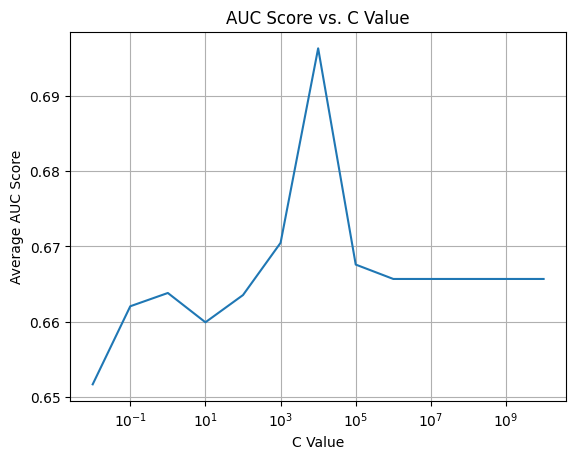

In [ ]:
plt.plot(C_range, auc_average)
plt.xscale('log')  # Use a logarithmic scale for the x-axis
plt.xlabel('C Value')
plt.ylabel('Average AUC Score')
plt.title('AUC Score vs. C Value')
plt.grid(True)
plt.show()

The C value controls the trade-off between maximising the margin and minimising classification errors. A higher C value penalises misclassifications more heavily.As you can see, the C value changing hasn't made much of a change to the AUC score. Lets look at the gamma hyperparameter.

In [ ]:
#creates an array of 13 numbers logarithmically spaced between 10^-9 and 10^3.
gamma_range = np.logspace(-15, 5, 21)
#Creating variables to store the best score, and its parameter
best_score = 0
best_params = 0
auc_average = []
for g in gamma_range:
  skf = StratifiedKFold(n_splits= 5)
  # Generate the indices for each fold, maintining the label ratios seen in non_test_labels
  indices = list(skf.split(non_test_examples, non_test_labels))
  pipeline = Pipeline([('scaler', StandardScaler()), ('model', SVC(gamma=g))])
  # calculate the accuracy scores for each of the 5 folds, using k-fold cross validation, and return them in an array
  auc = cross_val_score(pipeline, non_test_examples, non_test_labels, cv=indices, scoring='roc_auc')
  auc_average.append(np.mean(auc))
  if np.mean(auc) > best_score:
    best_score = np.mean(auc)
    best_params = g
# Show evaluation results graphically
print("Best Area Under Curve:", round(best_score,3),", with", best_params, " gamma value")

Best Area Under Curve: 0.707 , with 1e-13  gamma value


I will now include the C value and retest the code, as the model

In [ ]:
#creates an array of 13 numbers logarithmically spaced between 10^-9 and 10^3.
gamma_range = np.logspace(-15, 5, 21)
#Creating variables to store the best score, and its parameter
best_score = 0
best_params = 0
auc_average = []
for g in gamma_range:
  skf = StratifiedKFold(n_splits= 5)
  # Generate the indices for each fold, maintining the label ratios seen in non_test_labels
  indices = list(skf.split(non_test_examples, non_test_labels))
  pipeline = Pipeline([('scaler', StandardScaler()), ('model', SVC(gamma=g,C=10000))])
  # calculate the accuracy scores for each of the 5 folds, using k-fold cross validation, and return them in an array
  auc = cross_val_score(pipeline, non_test_examples, non_test_labels, cv=indices, scoring='roc_auc')
  auc_average.append(np.mean(auc))
  if np.mean(auc) > best_score:
    best_score = np.mean(auc)
    best_params = g
# Show evaluation results graphically
print("Best Area Under Curve:", round(best_score,3),", with", best_params, " gamma value")

Best Area Under Curve: 0.717 , with 1e-06  gamma value


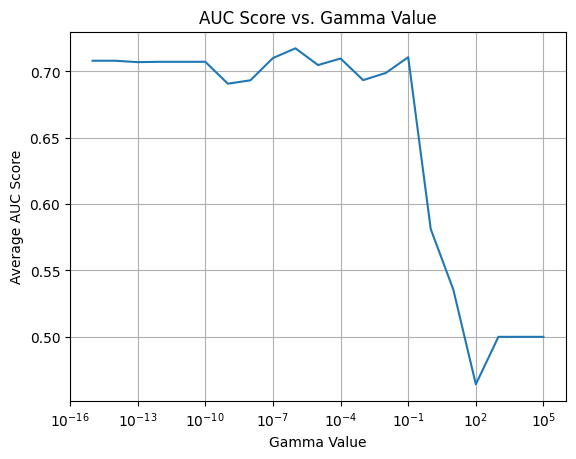

In [ ]:
# Plot the AUC scores against the gamma values
plt.plot(gamma_range, auc_average)
plt.xscale('log')  # Use a logarithmic scale for the x-axis
plt.xlabel('Gamma Value')
plt.ylabel('Average AUC Score')
plt.title('AUC Score vs. Gamma Value')
plt.grid(True)
plt.show()


As you can see from the results, we get an AUC score of 0.72, which has significantly improved the model's performance. I also want to test the coef0. According to the documentation page,coeF0 is a hyperparameter that performs well when using the poly kernel.

In [ ]:
coef0_range = list(np.arange(1,36,1))
#Creating variables to store the best score, and its parameter
best_score = 0
best_params = 0
auc_average = []
for a in coef0_range:
  skf = StratifiedKFold(n_splits= 5)
  # Generate the indices for each fold, maintining the label ratios seen in non_test_labels
  indices = list(skf.split(non_test_examples, non_test_labels))
  pipeline = Pipeline([('scaler', StandardScaler()), ('model', SVC(kernel='poly',coef0=a))])
  # calculate the accuracy scores for each of the 5 folds, using k-fold cross validation, and return them in an array
  auc = cross_val_score(pipeline, non_test_examples, non_test_labels, cv=indices, scoring='roc_auc')
  auc_average.append(np.mean(auc))
  if np.mean(auc) > best_score:
    best_score = np.mean(auc)
    best_params = a
# Show evaluation results graphically
print("Best Area Under Curve:", round(best_score,3),", with", best_params, " coef0 value")

Best Area Under Curve: 0.699 , with 22  coef0 value


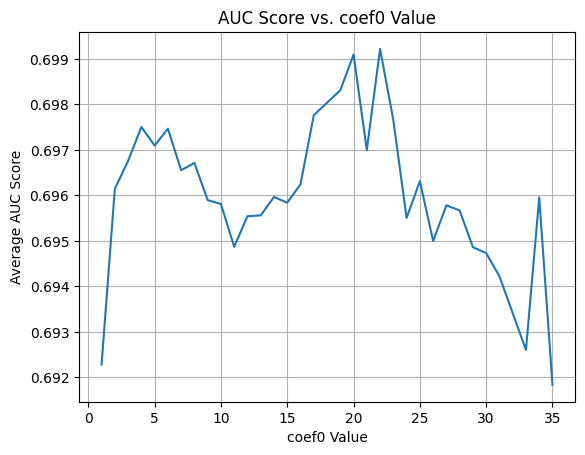

In [ ]:
plt.plot(coef0_range, auc_average)
plt.xlabel('coef0 Value')
plt.ylabel('Average AUC Score')
plt.title('AUC Score vs. coef0 Value')
plt.grid(True)
plt.show()

Finally I want to test the degree hyperparameter, as it is another high performer when using the poly kernel.The results show that 3 degree (the default value for this hyperparameter) is the best value for this hyperparameter, with an AUC score of 0.7.  

In [ ]:
degree_range = list(np.arange(1,35,1))
#Creating variables to store the best score, and its parameter
best_score = 0
best_params = 0
auc_average = []
for d in degree_range:
  #print(d)
  skf = StratifiedKFold(n_splits= 5)
  # Generate the indices for each fold, maintining the label ratios seen in non_test_labels
  indices = list(skf.split(non_test_examples, non_test_labels))
  pipeline = Pipeline([('scaler', StandardScaler()), ('model', SVC(kernel='poly',degree=d))])
  # calculate the accuracy scores for each of the 5 folds, using k-fold cross validation, and return them in an array
  auc = cross_val_score(pipeline, non_test_examples, non_test_labels, cv=indices, scoring='roc_auc')
  auc_average.append(np.mean(auc))
  if np.mean(auc) > best_score:
    best_score = np.mean(auc)
    best_params = d
# Show evaluation results graphically
print("Best Area Under Curve:", round(best_score,3),", with", best_params, " degree value")

Best Area Under Curve: 0.7 , with 3  degree value


### Conclusion

Now that we've tested the hyperparameters, we can go to the sucess_measure function and see how it perfroms using the best hyperparameters we have tested out, which was the C and gamma value.

Confusion Matrix:
[[ 7 34]
 [ 6 96]]


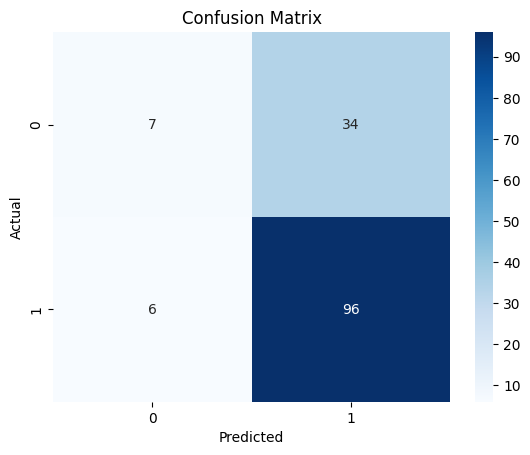

True Positive Rate (TPR): 0.941
False Positive Rate (FPR): 0.829
Precision: 0.738
Recall Score: 0.171
F1 Score: 0.277
Mean Squared Error: 0.193
ROC AUC: 0.702


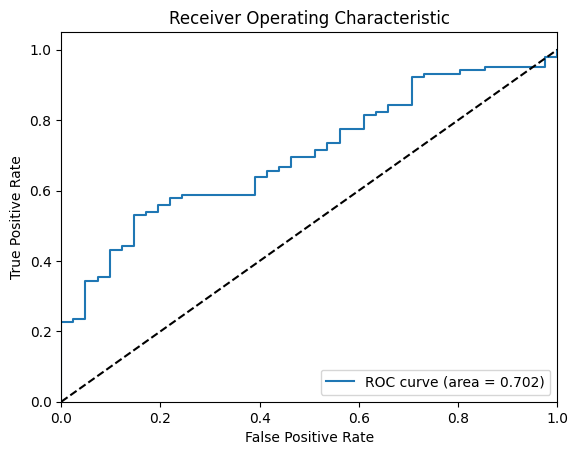

In [ ]:
# Create a pipeline combining our model with our preprocessing step
pipeline4 = Pipeline([('scaler', StandardScaler()),('model',SVC(kernel='poly',coef0=22,probability=True))])

#train model using training data
pipeline4.fit(non_test_examples, non_test_labels)

#run success function
success_measure(pipeline4, test_examples, test_labels)

As you can see, the data shows the similar outcome to previous models. Overall, this model shows mixed performance. It has high sensitivity but also a high false positive rate, suggesting it might be overpredicting the positive class. The low F1 score and the discrepancy between TPR and Recall score are concerning.

## Model 5 evaluation: Ensembles
The following code cell evaluates a Ensembles of models using voting, bagging and random patches. Using the pipelines that were used tested via the success function, I will be creating the ensembles to see if they can help us improve the overall performance of the models.

###Voting

Ensemble voting is a popular technique in ensemble learning where the final prediction is made by combining the predictions of multiple individual models. I've used the finalised pipelines of three models for this system, so that the hyperparameters are already applied and the models have been trained. This saved a lot of time and was much more efficent.

Confusion Matrix:
[[  2  39]
 [  1 101]]


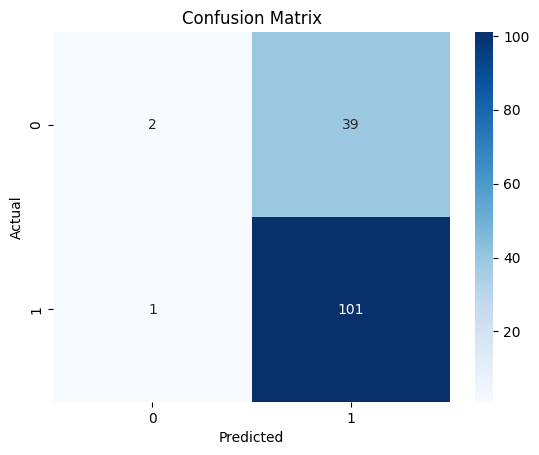

True Positive Rate (TPR): 0.990
False Positive Rate (FPR): 0.951
Precision: 0.721
Recall Score: 0.049
F1 Score: 0.091
Mean Squared Error: 0.178
ROC AUC: 0.741


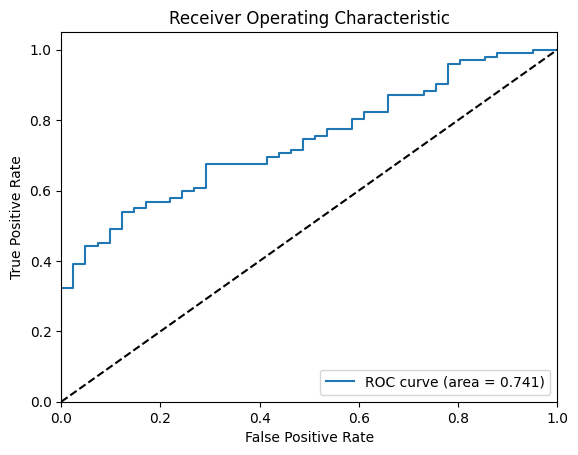

In [ ]:
# set the details of the classifiers we want to use (all using their default hyperparameters)
model1 = pipeline2 # Random Forest Classifier
model2 = pipeline3 # K-NN Classifier
model3 = pipeline4 # SVM
# Create a hard-voting ensemble composed of a k-NN, NB and DT classifier
voting_model = VotingClassifier(estimators=[('rfc', model1), ('knn', model2), ('svm', model3)], voting='soft')

# Fit the model to our training data
voting_model.fit(non_test_examples, non_test_labels)

success_measure(voting_model, test_examples, test_labels)

###Bagging

With bagging, I wanted to use the best performing classifier, which was the Random Forest Classifier. Bagging is where the same model is used multiple times and see what the majority outcome is. As you'll see, it performed relatively similar to the Random Forest Classifier.

Confusion Matrix:
[[ 5 36]
 [ 6 96]]


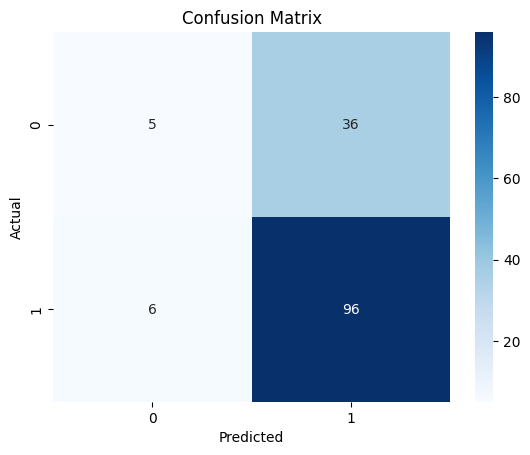

True Positive Rate (TPR): 0.941
False Positive Rate (FPR): 0.878
Precision: 0.727
Recall Score: 0.122
F1 Score: 0.209
Mean Squared Error: 0.175
ROC AUC: 0.739


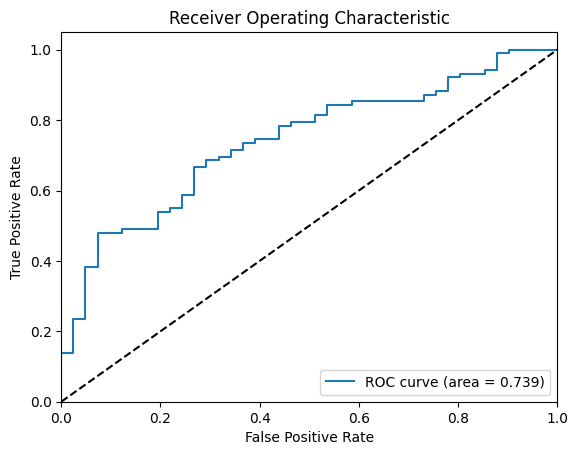

In [ ]:
from sklearn.ensemble import BaggingClassifier
# Create a bagging ensemble classifier componsed of 100 RFCs
bagging_model = BaggingClassifier(pipeline2, n_estimators=100, random_state=99)

# Fit the model to our training data
bagging_model.fit(non_test_examples, non_test_labels)

success_measure(bagging_model, test_examples, test_labels)

## Conclusion for Section 1

This investigation was conducted to see whether supervised learning could allow non-clinical staff to make fast and reliable pneumonia diagnoses without patients having to wait for review by clinical staff. This investigation considered the following models: Decision Tree Classifier, Random Forest Classifier, K-NN Classifier, and SVM. I also used ensembles such as Bagging and Voting. I found that the best individual model was the Random Forest Classifier. This model gave the strongest performance when running the success measurement function, with the following results:

* True Positive Rate (TPR): 0.980
* False Positive Rate (FPR): 0.878
* Precision: 0.735
* Recall Score: 0.122
* F1 Score: 0.209
* Mean Squared Error: 0.176
* ROC AUC: 0.738

Although it achieved an excellent performance score across a variety of measures, it also had a high false positive rate, showing a tendency to misclassify negative cases as positive. Furthermore, the poor recall score and F1 score show that the model is unable to reliably identify all positive cases. This pattern was found throughout each model. This pattern was also seen when using the ensembles, with voting performing 1% better than the random forest classifier but still having a high precision score but an extremely low recall score. This illustrates the difficulties associated with imbalanced datasets.

In our case, the lack of non-pneumonia patients is disproportionately underrepresented relative to the other.
To solve this issue approaches like oversampling, undersampling, and class weighting can be used to improve model performance. I felt reluctant to undersample and oversample due to the sensitivity of the case. Consequently, I believe that supervised learning models would not help non-clinical staff, as the results produced by the best model would not be deemed reliable in the medical field. To have a better-performing model, we need to collect further data to get to a better dataset that contains more observations, as well as test other learning models.

# Section 2 : Colleague Statement



## Introduction
In this section, I will assess the following statement: “Instead of hospital staff having to extract numerical measurements from x-rays manually, we can classify the raw x-ray images directly; it should be possible to get improved performance and save on staff time, without any downsides". I will critically analyse the potential benefits and limitations of direct image classification in medical contexts. Furthermore, I will create my own CNN model that will use raw X-ray images to try and see if I can compare my accuracy scores with the supervised learning models I trained previously, and come to my conclusion based on the colleague's statement.

## Analysis




###Can We Use Raw X Ray Images Directly?

In the colleague's statement, four key points warrant examination. Firstly, the colleague claims that we can use raw X-ray images directly in the model. This claim is possible, with many CNN models utilising raw images to predict and find any patterns. However, this approach may not get the optimal performance. Recent research suggests that preprocessing steps are crucial for maximising model efficiency and accuracy. Some research papers highlight preprocessing methods such as resizing(Hussein et al., 2024), normalizing, and using data augmentation(Yen and Tsao, 2024) to enhance the model's performance. While it's possible to use raw images, applying these preprocessing steps can significantly enhance the model's ability to learn relevant features. This is particularly crucial in pneumonia detection tasks, where subtle differences in X-ray images could misdiagnose a patient.

Another fact that needs to be considered is that the raw X-ray images do not give the history of the patient. Without the background of the patient's health, what looks like pneumonia, could be another lung-related disease, such as Lung Cancer, Asthma, or Bronchitis. If we train the model to specifically identify pneumonia purely from X-ray images alone, and have zero context of the patient, this could lead to the patient being misdiagnosed leading to further harm to the patient than good.

###Performance
The second claim suggests that classifying raw X-ray images should improve the learning model's performance. This assertion is well-supported by recent research in pneumonia detection. Machine learning techniques, particularly Convolutional Neural Networks (CNNs) and Vision Transformers (ViTs) have demonstrated promising results in directly classifying raw chest X-ray images for pneumonia (Mabrouk et al., 2023).

Several studies back this claim with impressive accuracy rates, with one study achieving 97.61% accuracy, 95% sensitivity, and 98% specificity in pneumonia detection using ViTs (Singh et al., 2024), whilst other pre-trained models such as DenseNet121 and Xception reported accuracies of 86.8% and 86.0% respectively (Salehi et al., 2021).These findings strongly support the colleague's claim regarding improved performance through direct classification of raw X-ray images. I will also examine my findings afterward and see if I can recreate these results by creating my own CNN model.

###Time Efficiency

The colleague's third point, that this process should save on staff time, is a valid point, supported by recent research. Automated systems have demonstrated the capability to process images faster than manual extraction methods, potentially expediting diagnosis. A study by Ahn et al. (2022) reported a 10% reduction in reporting time with AI assistance, decreasing from 40.8 seconds to 36.9 seconds per image—a difference of 3.9 seconds.Even more impressive results were found in a study by Bennani et al. (2023), where the mean reading time decreased from 81 seconds without AI to 56 seconds with AI, representing a substantial 31% reduction. Notably, the time savings were more pronounced for normal radiographs, with a 38% reduction in reading time, compared to a 17% reduction for radiographs with abnormalities.

While these studies demonstrate the potential for time savings through AI-assisted image analysis, it's crucial to consider the often-overlooked aspects of implementing such systems. The process of gathering, processing, and annotating data for AI training can be time-consuming and resource-intensive. Moreover, ensuring data quality and compliance with relevant laws and regulations adds another layer of complexity. On top of this, finding the correct model and tuning it for the specific case takes much longer to do, as you need to have enough processing power to handle the large amount of data being processed. Therefore, the potential for time savings in image analysis is evident, a holistic evaluation must account for the initial investment of time and resources in developing and maintaining these AI systems.

###Downsides

The integration of AI in diagnosing pneumonia presents a wide variety of opportunities and challenges, as evidenced by recent studies and surveys. These results demonstrate the complexity of the societal effects, technological issues, and ethical dilemmas surrounding the use of AI in healthcare.

Data privacy and ethical issues become the most important factors in this technological shift. According to a sizable percentage of radiographers (41.5%), the use of AI in radiology calls for the development of certain ethical standards (Faten Mane Aldhafeeri, 2024). Furthermore, 46.6% of respondents said that the use of AI raised privacy problems for patients (Faten Mane Aldhafeeri, 2024). These figures highlight how important it is to have strong ethical frameworks that uphold professional integrity and safeguard patient rights.

The use of AI is made more difficult by the possibility of technical bias. Research has demonstrated that bias may arise in AI datasets, which might favor or disadvantage group-level subsets according to a variety of criteria, including economic position, gender, and ethnicity (Geis et al., 2019). In order to ensure that technology improvements do not unintentionally reinforce current societal disparities, it is imperative that varied and representative data be used in the creation of AI and that fairness be continuously monitored.

Closely related to these ethical concerns is the issue of technological reliance and human oversight. A study found that 44% of respondents agreed that implementing AI in radiology may increase ethical dilemmas (Faten Mane Aldhafeeri, 2024). This suggests potential issues related to over-reliance on technology or misinterpretation of automated results. Consequently, 36.9% of radiographers indicated that AI systems in radiology should be transparent and provide justifications for their decision-making procedures (Faten Mane Aldhafeeri, 2024), emphasising the critical importance of maintaining human oversight and accountability.

The introduction of AI has important economic ramifications as well. According to PwC's study, the impact on the labor market is complex, with an estimated 7.2 million new employment being created in the UK over the next 20 years, offset by the possible loss of almost 7 million existing positions due to AI (How many jobs will AI generate in healthcare?, 2023). This shows the revolutionary potential of AI in the healthcare workforce, even as it also suggests a possible net-neutral effect.

Problems with implementation go beyond workforce issues. Healthcare organisations face a severe cost hurdle as a result of the enormous computing resources and infrastructure expenditures required for the implementation of AI (Geis et al., 2019). The possible advantages of increased diagnostic efficiency and accuracy must be carefully balanced against these expenses. Particularly when it comes to the NHS, which is now required to sustain its level of work while having very little funding.



## CNN Code For Raw Image Processing

###Data Preparation

Building upon the research I've examined, I will now develop a CNN model to process raw image data sourced from Kaggle. This dataset, comprising over 5,000 chest X-ray images, was collected from pediatric patients aged one to five at the Guangzhou Women and Children's Medical Center (Mooney, 2018). The significantly larger dataset, compared to the CSV file used in our previous supervised learning models, could substantially impact the CNN model's performance. This underscores a common challenge in model development: the need for extensive, high-quality data. The images are pre-divided into training, testing, and validation sets, which will be used to construct the CNN model. To optimise the model's performance, I will first prepare the raw data as mentioned earlier.

In [ ]:
import os

def count_images(directory):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']
    count = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                count += 1
    return count

# Base directory
base_dir = '/content/drive/MyDrive/AI/1CWK100'

# Folders to check
folders = ['train', 'test', 'val']

for folder in folders:
    print(f"\n{folder.capitalize()} folder:")
    folder_path = os.path.join(base_dir, folder)
    total_count = 0

    for class_name in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_name)
        if os.path.isdir(class_path):
            class_count = count_images(class_path)
            print(f"  {class_name}: {class_count} images")
            total_count += class_count

    print(f"Total in {folder}: {total_count} images")

# Grand total
grand_total = sum(count_images(os.path.join(base_dir, folder)) for folder in folders)
print(f"\nGrand total: {grand_total} images")


Train folder:
  NORMAL: 1341 images
  PNEUMONIA: 3875 images
Total in train: 5216 images

Test folder:
  NORMAL: 234 images
  PNEUMONIA: 390 images
Total in test: 624 images

Val folder:
  PNEUMONIA: 8 images
  NORMAL: 8 images
Total in val: 16 images

Grand total: 5856 images


As you can see from the code above, the training data presents data imbalance, which we previously saw in the first section. In order to overcome this, I will create a new folder that balances the training data by using undersampling of the pneumonia data in the train folder.

In [ ]:
import random
import shutil

# Define the paths

train_folder = os.path.join(base_dir, 'train')
normal_folder = os.path.join(train_folder, 'NORMAL')
pneumonia_folder = os.path.join(train_folder, 'PNEUMONIA')
undersampled_folder = os.path.join(base_dir, 'train_undersampled')

# Create the undersampled folder if it doesn't exist
os.makedirs(undersampled_folder, exist_ok=True)

# Get the list of images in each class
normal_images = os.listdir(normal_folder)
pneumonia_images = os.listdir(pneumonia_folder)

# Randomly select pneumonia images to match the number of normal images
selected_pneumonia = random.sample(pneumonia_images, len(normal_images))

# Copy normal images to the undersampled folder
for img in normal_images:
    src = os.path.join(normal_folder, img)
    dst = os.path.join(undersampled_folder, 'NORMAL', img)
    os.makedirs(os.path.dirname(dst), exist_ok=True)
    shutil.copy(src, dst)

# Copy selected pneumonia images to the undersampled folder
for img in selected_pneumonia:
    src = os.path.join(pneumonia_folder, img)
    dst = os.path.join(undersampled_folder, 'PNEUMONIA', img)
    os.makedirs(os.path.dirname(dst), exist_ok=True)
    shutil.copy(src, dst)

print(f"Undersampling complete. New distribution:")
print(f"NORMAL: {len(normal_images)} images")
print(f"PNEUMONIA: {len(selected_pneumonia)} images")
print(f"Total in undersampled train: {len(normal_images) + len(selected_pneumonia)} images")


NameError: name 'base_dir' is not defined

During the execution of this code, it approximately took more than 15 minutes, which highlights how much processing power and energy is needed to train these models. As model's aren't perfected first time around, It must be taken into consideraion the time and energy taken to fully train and optimise these models.

Now that I have a balanced training dataset, the next step is to sets up data pipelines for training and validation datasets using Keras' ImageDataGenerator. Initially, I only had the undersampled training data, but I wanted to included the original too, just to see the difference between the two. The ImageDataGenerator doesn't actually create new permanent images, but rather applies transformations dynamically during the training process(Rosebrock, 2019).This ensures efficient image loading, preprocessing, and augmentation, which are critical for developing robust machine learning models. This approach provides the benefits of an expanded dataset without increasing storage requirements.



In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255, # Normalizes pixel values to [0,1] range
    rotation_range=20,#Randomly rotates images up to 20 degrees
    width_shift_range=0.2,#Randomly shifts images horizontally and vertically
    height_shift_range=0.2,# Applies shearing transformations
    shear_range=0.2,#Applies shearing transformations
    zoom_range=0.2,#Randomly zooms images
    horizontal_flip=True, #Randomly flips images horizontally
    fill_mode='nearest'#Fills in newly created pixels after a rotation or shift
)

test_datagen = ImageDataGenerator(rescale=1./255) # Creates a generator for test data, only applying normalization

undersampled_train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AI/1CWK100/train_undersampled',
    target_size=(224, 224),# Resizes all images to 224x224 pixels
    batch_size=32,#Processes 32 images at a time
    class_mode='binary',#Indicates a binary classification problem
    shuffle=True
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AI/1CWK100/train',
    target_size=(224, 224),# Resizes all images to 224x224 pixels
    batch_size=32,#Processes 32 images at a time
    class_mode='binary',#Indicates a binary classification problem
    shuffle=True
)


validation_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/AI/1CWK100/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/AI/1CWK100/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 2682 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


After creating the pipelines, I wanted to visualise how the training data looked compaired to the test data.

Training Data


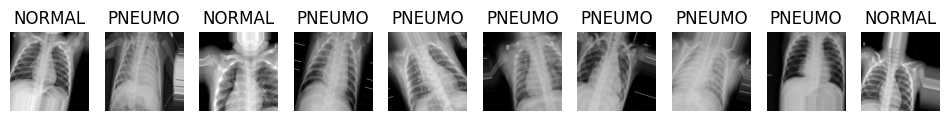

Undersampled Training Data


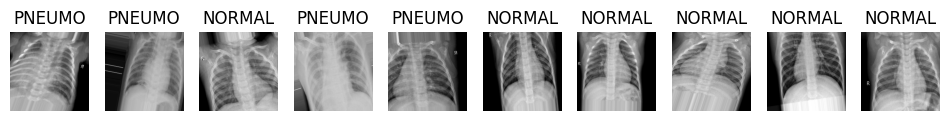

Testing Data


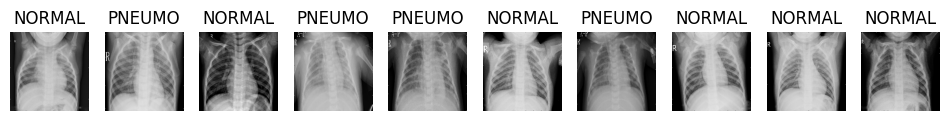

In [ ]:
# Function to plot images in a grid
def plot_images(generator,class_names):
    # Get a batch of images and labels from the generator
    images, labels = next(generator)
    # Plot the images
    fig, axes = plt.subplots(1, 10, figsize=(12, 3))
    for i in range(10):
        # Display images from the current batch
        axes[i].imshow(images[i])
        # Assuming labels are numeric, map them to class names
        axes[i].set_title(class_names[int(labels[i])])
        axes[i].axis('off')
    plt.show()

# Define the classes
class_names = ['NORMAL','PNEUMO']

# Plot first 10 images from the training data
print("Training Data")
plot_images(train_generator,class_names)
print("Undersampled Training Data")
plot_images(undersampled_train_generator,class_names)
print("Testing Data")
plot_images(validation_generator,class_names)

### Creating Model

Now the data has been preprocessed and cleaned , it is time to train the model.This code defines and trains a Convolutional Neural Network (CNN) using TensorFlow and Keras. The architecture consists of three convolutional layers with ReLU activation, interspersed with max pooling layers for feature extraction and dimensionality reduction. The model then flattens the output and passes it through two dense layers with 256 units each, employing ReLU activation and dropout (0.5 rate) to mitigate overfitting. The final layer uses sigmoid activation for binary classification. Two identical models (modelv1 and modelv2) are compiled using the Adam optimiser and binary cross-entropy loss function, with Area Under the Curve (AUC) as the performance metric. The AUC performance metric has been used here so I can compare with section one models, specifically the random forest classifier, as it was the best performer.

The training process uses data generators for both training and validation sets, with the number of steps per epoch calculated based on the dataset size and batch size. The model is then trained for 10 epochs, using the specified training and validation data generators, with the training history stored for later analysis. I then duplicated the model so that I can see how it performs with the undersmapled data.

In [ ]:
# Define the model architecture
modelv1 = tf.keras.models.Sequential([
    # Convolutional layer with 32 filters, 3x3 kernel, ReLU activation, and input shape
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    # Max pooling layer with 2x2 pool size
    tf.keras.layers.MaxPooling2D(2, 2),
    # Second convolutional layer with 64 filters and 3x3 kernel
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # Another max pooling layer
    tf.keras.layers.MaxPooling2D(2, 2),
    # Final convolutional layer with 64 filters and 3x3 kernel
    tf.keras.layers.Flatten(),
    # Dense layer with 64 units and ReLU activation
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout layer to prevent overfitting
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout layer to prevent overfitting
    # Output layer with sigmoid activation for binary classification
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

modelv2 = modelv1

# Compile the model
modelv1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
modelv2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

#overall understanding of the model
modelv2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,861,441 (182.58 MB)

 Trainable params: 47,861,441 (182.58 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

print("Train Data")
# Train the model
history1 = modelv1.fit(
    train_generator,
    epochs=10,
    steps_per_epoch=5,
    validation_data=validation_generator,
    callbacks=[tensorboard_callback]
)
print("Undersampled Data")
# Train the model
history2 = modelv2.fit(
    undersampled_train_generator,
    epochs=10,
    steps_per_epoch=5,
    validation_data=validation_generator,
    callbacks=[tensorboard_callback]
)

Train Data
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 140s 11s/step - AUC: 0.4904 - loss: 3.4566 - val_AUC: 0.5781 - val_loss: 1.1445
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 50s 11s/step - AUC: 0.4990 - loss: 1.7019 - val_AUC: 0.6406 - val_loss: 0.7400
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 52s 10s/step - AUC: 0.5061 - loss: 0.6696 - val_AUC: 0.6094 - val_loss: 0.7243
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 47s 10s/step - AUC: 0.4058 - loss: 0.6019 - val_AUC: 0.6406 - val_loss: 0.7395
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 46s 9s/step - AUC: 0.6558 - loss: 0.6020 - val_AUC: 0.6016 - val_loss: 0.7878
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 50s 10s/step - AUC: 0.5762 - loss: 0.5577 - val_AUC: 0.7344 - val_loss: 0.7212
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 45s 9s/step - AUC: 0.6704 - loss: 0.5158 - val_AUC: 0.6641 - val_loss: 1.0181
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 8s/step - AUC: 0.5619 - loss: 0.6690 - val_AUC: 0.8281 - val_loss: 0.6756
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 43s 9s/step - AUC: 0.7293 - loss: 0.5405 - val_AUC: 0.789

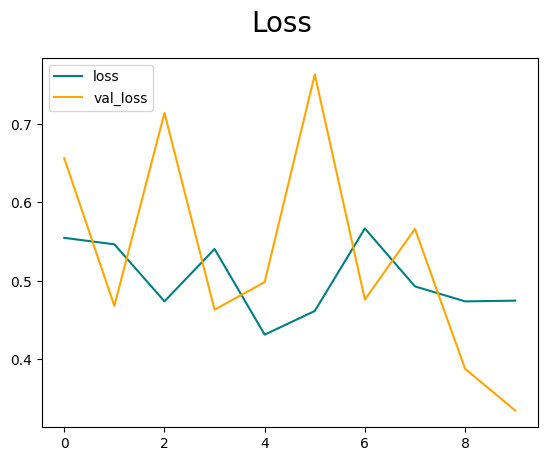

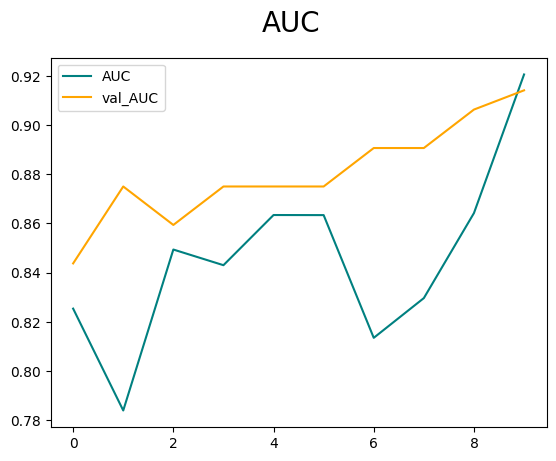

In [ ]:
fig = plt.figure()
#plotting training loss vs validation loss
plt.plot(history2.history['loss'], color='teal', label='loss')
plt.plot(history2.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()
#plotting training AUC vs validation AUC
fig = plt.figure()
plt.plot(history2.history['AUC'], color='teal', label='AUC')
plt.plot(history2.history['val_AUC'], color='orange', label='val_AUC')
fig.suptitle('AUC', fontsize=20)
plt.legend(loc="upper left")

During the model creation process, I was constantly changing small parameters, from the epoch to the amount of layers the model had. This process took me approximately 5 hours and I still could not perfect it.

These graphs are essential for evaluating a model's performance during training, helping identify issues like overfitting and guiding adjustments in model architecture or hyperparameters to enhance generalisation capabilities.

After running both models, I wanted to test the undersampled model and see how it performs with test data. The loss value indicated that it could have potentially become overfitted. To test this out, I created a confusion matrix to analyse what the model was doing.

In [ ]:
test_loss, test_acc = modelv2.evaluate(test_generator, steps=50)
print('Test accuracy:', test_acc)

50/50 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - AUC: 0.8324 - loss: 0.5770


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


Test accuracy: 0.8348181247711182


20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step


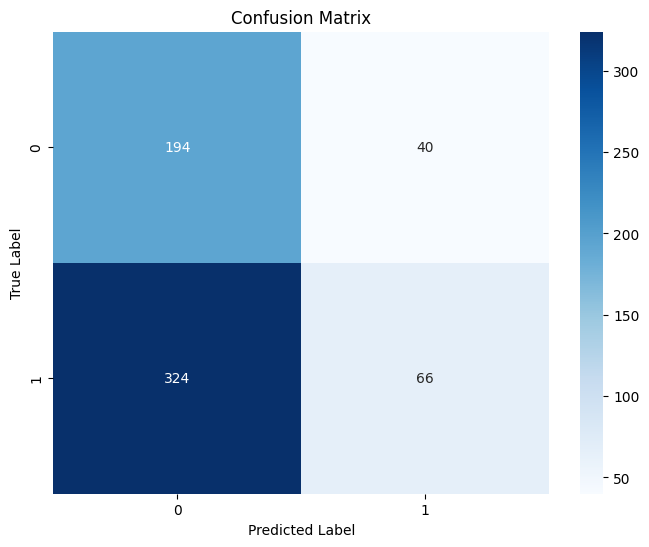

              precision    recall  f1-score   support

           0       0.37      0.83      0.52       234
           1       0.62      0.17      0.27       390

    accuracy                           0.42       624
   macro avg       0.50      0.50      0.39       624
weighted avg       0.53      0.42      0.36       624



In [ ]:
# Make predictions
y_pred = modelv2.predict(test_generator)
y_pred_classes = (y_pred > 0.5).astype(int).reshape(-1)  # Convert probabilities to class labels

# Get true labels
y_true = test_generator.classes

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_classes))

The undersampled dataset appears to provide more stable and improved results compared to the original dataset, especially in terms of validation metrics. This reinforces my findings from the first section, as undersampling seemed to be a suitable option in my conclusion. As you can see from the results, these scores suggest that the model's performance is relatively poor, with an accuracy close to random guessing (50%). The model shows a bias towards class 0 in terms of recall and towards class 1 in terms of precision.After running these tests, I felt like I needed to give the model more time to run, so I increased both epoch and steps per epoch. I also introduced a L2 Regularisation into the model to try and prevent the overfitting from occuring.

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import regularizers
# Define the model architecture
modelv3 = tf.keras.models.Sequential([
    # Convolutional layer with 32 filters, 3x3 kernel, ReLU activation, and input shape
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    # Max pooling layer with 2x2 pool size
    tf.keras.layers.MaxPooling2D(2, 2),
    # Second convolutional layer with 64 filters and 3x3 kernel
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # Another max pooling layer
    tf.keras.layers.MaxPooling2D(2, 2),
    # Final convolutional layer with 64 filters and 3x3 kernel
    tf.keras.layers.Flatten(),
    # Dense layer with 64 units and ReLU activation
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout layer to prevent overfitting
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),  # Dropout layer to prevent overfitting
    # Output layer with sigmoid activation for binary classification
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

modelv3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])


history = modelv3.fit(
    undersampled_train_generator,
    epochs=30,
    steps_per_epoch=15,
    validation_data=validation_generator,
    #callbacks=[lr_scheduler]
)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 99s 6s/step - AUC: 0.5231 - loss: 5.2510 - val_AUC: 0.5938 - val_loss: 2.6513
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 78s 5s/step - AUC: 0.5993 - loss: 2.5306 - val_AUC: 0.7500 - val_loss: 2.2474
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 79s 5s/step - AUC: 0.5788 - loss: 2.1670 - val_AUC: 0.8438 - val_loss: 1.9357
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 79s 5s/step - AUC: 0.7252 - loss: 1.8439 - val_AUC: 0.8594 - val_loss: 1.6372
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 86s 6s/step - AUC: 0.8292 - loss: 1.5702 - val_AUC: 0.8594 - val_loss: 1.4824
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - AUC: 0.8656 - loss: 1.3728 - val_AUC: 0.8594 - val_loss: 1.4097
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 77s 5s/step - AUC: 0.8246 - loss: 1.3687 - val_AUC: 0.8906 - val_loss: 1.2224
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 68s 5s/step - AUC: 0.8701 - loss: 1.2383 - val_AUC: 0.8594 - val_loss: 1.1622
Epoch 9/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 68s 4s/step - AUC: 0.8801 - loss: 

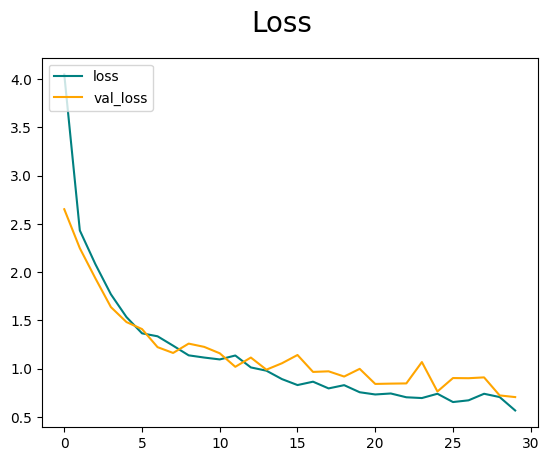

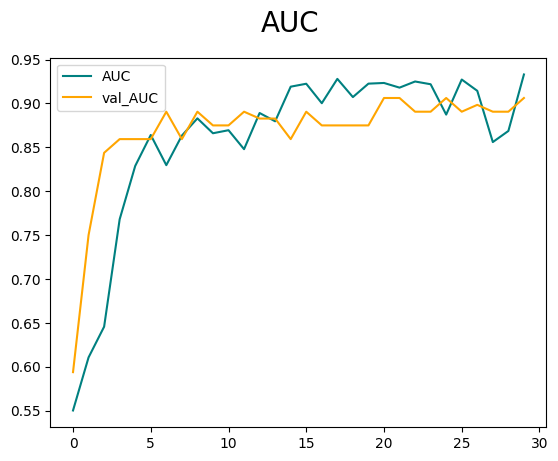

In [ ]:
fig = plt.figure()
#plotting training loss vs validation loss
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()
#plotting training AUC vs validation AUC
fig = plt.figure()
plt.plot(history.history['AUC'], color='teal', label='AUC')
plt.plot(history.history['val_AUC'], color='orange', label='val_AUC')
fig.suptitle('AUC', fontsize=20)
plt.legend(loc="upper left")

20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step


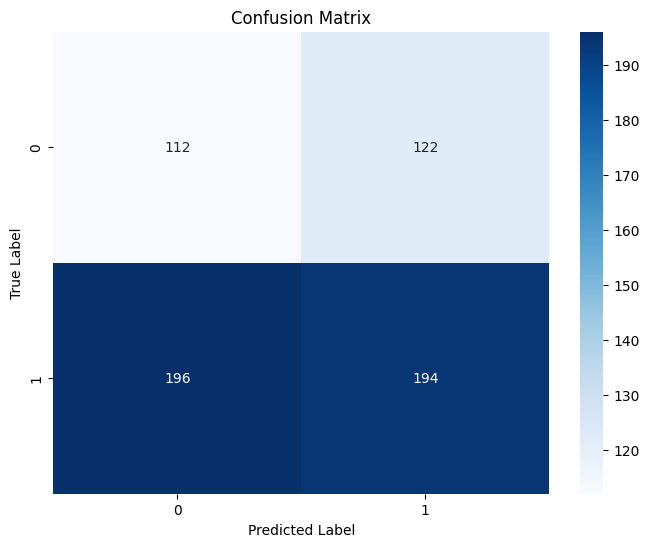

              precision    recall  f1-score   support

           0       0.36      0.48      0.41       234
           1       0.61      0.50      0.55       390

    accuracy                           0.49       624
   macro avg       0.49      0.49      0.48       624
weighted avg       0.52      0.49      0.50       624



In [ ]:
# Make predictions
y_pred = modelv3.predict(test_generator, steps=len(test_generator))
y_pred_classes = (y_pred > 0.5).astype(int).reshape(-1)  # Convert probabilities to class labels

# Get true labels
y_true = test_generator.classes

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_classes))

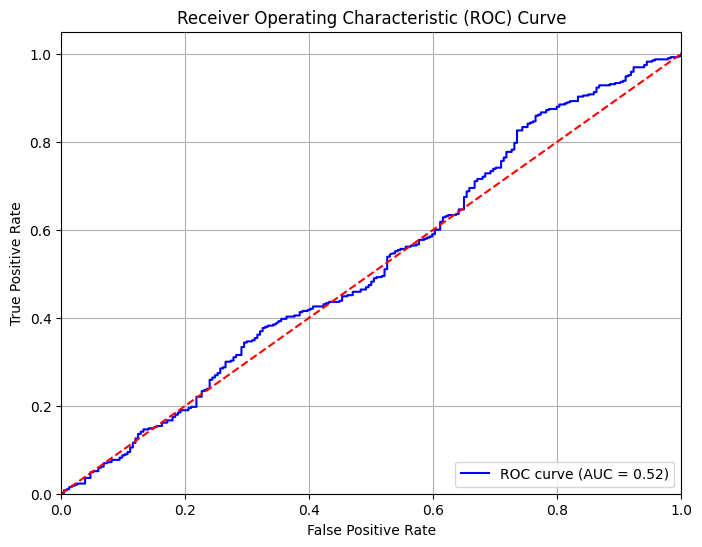

AUC: 0.521


In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Calculate AUC
auc_score = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"AUC: {auc_score:.3f}")

As you can see from my attempt of creating a CNN model, it originally gave me promising validation AUC scores of 0.93 and a loss of 0.39, but when testing the model with test data, it had an AUC score of 0.52. This was much lower than our section one model, which able to gather a AUC score of 0.73. Although this is disheartening, it proves the point it is extremely hard to train up these models, and take team of AI researchers to create a model that is perfected to detect pneumonia. There could have been multiple different factors that could have hindered my model, from 2D Convolutional layers to something small as the amount of epochs I used. I was also limited by the application I was using, as you have to pay for extra processing power, which could have easily benifit me.

At this point, I decided to use a pre-trained model, as these models had already proven to be more effective and time efficient. Again I would have to tune these models in order to make them suitable for the dataset we currently have. After looking through research papers, I came across the VGG16 model, which was developed at the University of Oxford. This model includes 16 layers, 13 convolutional layers and 3 fully connected layers(Hassan, 2018). This model was used to detect COVID-19 and had extremely high accuracy (99%) (Yang et al., 2021), so it can be assumed that the model would be able to handle pneumonia x rays too. This model also included learning rate scheduler. A learning rate scheduler is an algorithm that adjusts the learning rate during training according to a predefined strategy or based on performance metrics. This helps in optimising the training process by preventing issues such as overshooting or getting stuck in local minima.

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Use VGG16 as base model, without top layers, for transfer learning
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers to prevent them from being updated during training
base_model.trainable = False

# Define the model architecture
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),  # Reduce spatial dimensions
    tf.keras.layers.Dense(256, activation='relu'),  # Dense layer with 256 units
    tf.keras.layers.Dropout(0.5),  # Dropout layer to prevent overfitting
    tf.keras.layers.Dense(128, activation='relu'),  # Another dense layer
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Define learning rate scheduler to reduce LR when validation AUC plateaus
lr_scheduler = ReduceLROnPlateau(monitor='val_AUC', factor=0.5, patience=3, min_lr=1e-6)

# Compile the model with Adam optimizer and binary crossentropy loss
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['AUC'])

# Train the model
history = model.fit(
    undersampled_train_generator,
    steps_per_epoch=5,  # Number of batches per epoch
    epochs=15,  # Total number of epochs to train
    validation_data= validation_generator,
    callbacks=[lr_scheduler]  # Use the learning rate scheduler during training
)

Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 139s 26s/step - AUC: 0.4540 - loss: 0.8295 - val_AUC: 0.3438 - val_loss: 0.7032 - learning_rate: 1.0000e-04
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 115s 24s/step - AUC: 0.5052 - loss: 0.7759 - val_AUC: 0.4141 - val_loss: 0.6978 - learning_rate: 1.0000e-04
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 121s 25s/step - AUC: 0.4863 - loss: 0.8106 - val_AUC: 0.3906 - val_loss: 0.6953 - learning_rate: 1.0000e-04
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 117s 24s/step - AUC: 0.5124 - loss: 0.7739 - val_AUC: 0.5547 - val_loss: 0.6917 - learning_rate: 1.0000e-04
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 116s 24s/step - AUC: 0.5713 - loss: 0.7201 - val_AUC: 0.6172 - val_loss: 0.6898 - learning_rate: 5.0000e-05
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 117s 24s/step - AUC: 0.4542 - loss: 0.8289 - val_AUC: 0.6484 - val_loss: 0.6880 - learning_rate: 5.0000e-05
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 116s 24s/step - AUC: 0.4859 - loss: 0.7681 - val_AUC: 0.6797 - val_loss: 0.6861 - learning_rate: 5.0

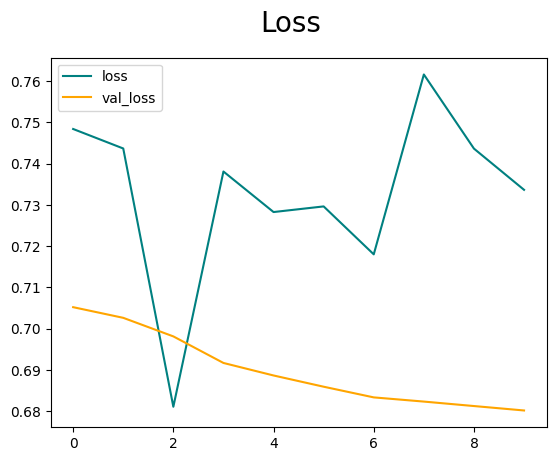

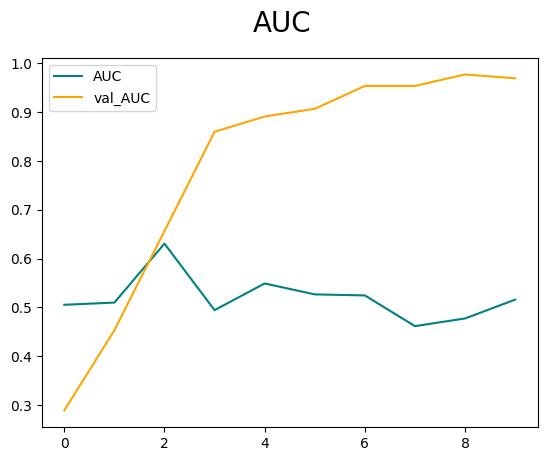

In [ ]:
fig = plt.figure()
#plotting training loss vs validation loss
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()
#plotting training AUC vs validation AUC
fig = plt.figure()
plt.plot(history.history['AUC'], color='teal', label='AUC')
plt.plot(history.history['val_AUC'], color='orange', label='val_AUC')
fig.suptitle('AUC', fontsize=20)
plt.legend(loc="upper left")

20/20 ━━━━━━━━━━━━━━━━━━━━ 413s 21s/step


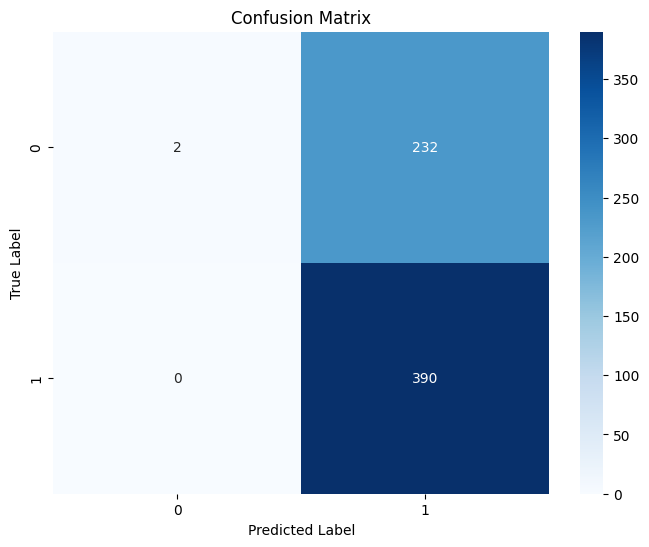

              precision    recall  f1-score   support

           0       1.00      0.01      0.02       234
           1       0.63      1.00      0.77       390

    accuracy                           0.63       624
   macro avg       0.81      0.50      0.39       624
weighted avg       0.77      0.63      0.49       624



In [ ]:
# Make predictions
y_pred = model.predict(test_generator, steps=len(test_generator))
y_pred_classes = (y_pred > 0.5).astype(int).reshape(-1)  # Convert probabilities to class labels

# Get true labels
y_true = test_generator.classes

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_classes))

Again, it is evident that there is clearly a case of overfitting, and although I could try tuning the model, I eventually ran out of time to do so, as my deadline approached. I spent over 20 hours on fine-tuning my own model and tried to retrieve the best AUC Score, which unfortunately failed to meet the same standards as the research papers. Although this doesn't disprove their research papers, it does allow me to weigh into the colleague's statement.

##Conclusion for Section 2

In conclusion, while the assertion that directly classifying raw X-ray images can improve performance and save time for hospital staff is compelling, I must respectfully disagree with the notion that this approach comes without downsides. The analysis reveals that although advancements in machine learning, particularly through CNNs and ViTs, demonstrate promising accuracy rates in pneumonia detection, the absence of preprocessing steps may hinder optimal model performance. Furthermore, relying solely on raw images disregards crucial patient history, potentially leading to misdiagnosis and adverse health outcomes.

Additionally, while automation can indeed enhance efficiency in image processing, it is essential to consider the initial investment of time and resources required for developing and maintaining these AI systems. Whilst creating my own model, I felt that this factor is overlooked when creating my models, as it takes multiple attempts across endless hours to even get a 2% increase within a model. Moreover, the ethical implications of AI integration in healthcare cannot be overlooked; concerns regarding data privacy, technological bias, and the need for human oversight highlight the complexities of this transition.

Finally, while the potential benefits of AI in radiology are enormous, they should be addressed with caution. A balanced strategy that promotes ethical issues, technical justice, and patient well-being is essential for effective deployment. Collaboration among healthcare practitioners, technologists, and politicians is required to guarantee that AI systems are not only effective, but also responsible and in line with patient-centered care. Thus, the path of incorporating AI into medical practice should be carefully managed in order to optimise advantages while reducing hazards.

# References

If you draw from other sources then you need to properly cite and reference

them Cite Them Right Harvard. This would mean adding citations at the relevant points higher up the notebook, as well as corresponding references here. The MMU library guidance for Cite Them Right Harvard is available [here](https://www.mmu.ac.uk/library/referencing-and-study-support/referencing/cite-them-right-harvard).

* Hussein, A. M., Abdulrauf Garba Sharifai, Alia, O. M., Laith Abualigah, Almotairi, K. H., Sohaib K. M. Abujayyab and Gandomi, A. H. (2024) ‘Auto-detection of the coronavirus disease by using deep convolutional neural networks and X-ray photographs.’ Scientific Reports. Nature Portfolio, 14(1).

* Yen, C.-T. and Tsao, C.-Y. (2024) ‘Lightweight convolutional neural network for chest X-ray images classification.’ Scientific Reports. Springer Science and Business Media LLC, 14(1).

* Mabrouk, A., Diaz Redondo, R. P., Dahou, A., Abd Elaziz, M. and Kayed, M. (2023) Pneumonia Detection on chest X-ray images Using Ensemble of Deep Convolutional Neural Networks. Arxiv.org. [Online] [Accessed on 3rd January 2025] https://arxiv.org/html/2312.07965v1/#S6‌

* Singh, S., Kumar, M., Kumar, A., Verma, B. K., Kumar Abhishek and Shitharth Selvarajan (2024) ‘Efficient pneumonia detection using Vision Transformers on chest X-rays.’ Scientific Reports. Nature Portfolio, 14(1).

* Salehi, M., Mohammadi, R., Ghaffari, H., Sadighi, N. and Reiazi, R. (2021) ‘Automated detection of pneumonia cases using deep transfer learning with paediatric chest X-ray images.’ The British Journal of Radiology. Oxford University Press (OUP), 94(1121)  [Online] [Accessed on 3rd January 2025] https://pmc.ncbi.nlm.nih.gov/articles/PMC8506182/

* Ahn, J. S., Ebrahimian, S., McDermott, S., Lee, S., Naccarato, L., Di, J. F., Wu, M. Y., Zhang, E. W., Muse, V., Miller, B., Farid Sabzalipour, Bizzo, B. C., Dreyer, K. J., Kaviani, P., Digumarthy, S. R. and Kalra, M. K. (2022) ‘Association of Artificial Intelligence–Aided Chest Radiograph Interpretation With Reader Performance and Efficiency.’ JAMA Network Open. American Medical Association, 5(8) [Online] [Accessed on 3rd January 2025] https://jamanetwork.com/journals/jamanetworkopen/fullarticle/2795798

* Bennani, S., Nor-Eddine Regnard, Ventre, J., Lassalle, L., Nguyen, T., Ducarouge, A., Dargent, L., Enora Guillo, Elodie Gouhier, Sophie-Hélène Zaimi, Canniff, E., Cécile Malandrin, Philippe Khafagy, Hasmik Koulakian, Revel, M.-P. and Guillaume Chassagnon (2023) ‘Using AI to Improve Radiologist Performance in Detection of Abnormalities on Chest Radiographs.’ Radiology. Radiological Society of North America, 309(3). [Online] [Accessed on 3rd January 2025] https://pubs.rsna.org/doi/full/10.1148/radiol.230860

* Faten Mane Aldhafeeri (2024) ‘Navigating the ethical landscape of artificial intelligence in radiography: a cross-sectional study of radiographers’ perspectives.’ BMC Medical Ethics. BioMed Central, 25(1).[Online] [Accessed on 5th January 2025] https://pubmed.ncbi.nlm.nih.gov/38734602/

* How many jobs will AI create in healthcare? (2023) Matchtech. [Online] [Accessed on 5th January 2025] https://www.matchtech.com/resources/ai-jobs-in-healthcare.

* Geis, J. R., Brady, A. P., Wu, C. C., Spencer, J., Ranschaert, E., Jaremko, J. L., Langer, S. G., Kitts, A. B., Birch, J., Shields, W. F., Robert, Kotter, E., Gichoya, J. W., Cook, T. S., Morgan, M. B., Tang, A., Safdar, N. M. and Kohli, M. (2019) ‘Ethics of Artificial Intelligence in Radiology: Summary of the Joint European and North American Multisociety Statement.’ Radiology. Radiological Society of North America, vol 293(2) [Online] [Accessed on 5th January 2025] https://pubs.rsna.org/doi/10.1148/radiol.2019191586

* Mooney, P. (2018) ‘Chest X-Ray Images (Pneumonia).’ Kaggle.com. [Online] [Accessed on 9th January 2025] https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

* Rosebrock, A. (2019) Keras ImageDataGenerator and Data Augmentation - PyImageSearch. PyImageSearch. [Online] [Accessed on 9th January 2025] https://pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/.

* Hassan, M. ul (2018) VGG16 - Convolutional Network for Classification and Detection. Neurohive.io. [Online] [Accessed on 10th January 2025] https://neurohive.io/en/popular-networks/vgg16/.

‌


# Submission

Once you're ready to submit, you need to compress the whole of your 1CWK100 folder as a .zip file (no other compression formats), and upload it to Moodle. There are several ways to do this, but the instructions below offer a simple step-by-step guide:

*    Make sure the output from all your code cells is showing (you can select 'Runtime' -> 'Run all' if you need to)
*    Save your notebook (select 'File' -> 'Save')
*    Find your /1CWK100/ folder via the Google Drive web interface ([https://drive.google.com/](https://https://drive.google.com/))
*    Right-click on the /1CWK100/ folder, and select 'Download'. This will cause the folder to be compressed into a .zip file and then downloaded to your local machine.
*    Upload the resulting .zip file to the 1CWK100 submission point on Moodle.

**We recommend testing these steps, and asking any questions you might have, well before the final deadline.**